# Section 2
## Structuring Biomedical Data Using Networks 

- talk about features of biomedical datasets and the issues around working with them
 - heterogeneity of data types
 - outliers, noise, missing values
 - network construction decisions - filtering, kNN, similarity calulation - effects of different data modalities
 - introduce some of the key data types - transcriptomics, methylation etc.
 - introduce GenScot study and describe the data
- notebooks doing the initial processing of example data set(s) culminating with the GenScot set
- emerge from sessions with a selection of networks to work on later in the workshop

# Workshop Agenda: Working with TCGA Data and Network Analysis

## 1. Data Management
   - **1.1 Saving Data**: Techniques for efficient data storage.
   - **1.2 Loading Data**: Best practices for importing data.
   - **1.3 Data Cleaning**:
     - Checking for and handling missing data.
     - Outlier detection and remediation.
   - **1.4 Data Visualization**:
     - Creating metadata plots for basic analysis of patient numbers.
     - Evaluating features through simple plots.
   - **1.5 Assessing Data Quality**:
     - Checking for heterogeneity in the data.

## 2. Network Generation
   - **2.1 Correlation Matrix**: Construction and analysis.
   - **2.2 Data Preprocessing**:
     - Scaling and normalization.
     - Log transformation.
     - Analyzing variable distribution.
   - **2.3 Correlation Measures**:
     - Pearson, Spearman, and Euclidean correlations.
     - Absolute biweight midcorrelation.
     - Log-transformed Pearson correlation.
   - **2.4 Outputting the Adjacency Matrix**: From correlation to network structure.

## 3. Network Sparsification
   - **3.1 Thresholding Methods**:
     - Thresholding by degree.
     - Thresholding by closeness.
     - Thresholding by edge weight.
   - **3.2 k-Nearest Neighbors (KNN)**:
     - Basic KNN sparsification.
     - KNN combined with thresholding.
   - **3.3 Advanced Sparsification Techniques**:
     - Maximizing edge weight retention.
   - **3.4 Managing Graph Objects**:
     - Selecting the optimal graph representat

## TODO add SFARI genes as labels and show some visualization techniquesion for progressing to gene networks.

## 4. Types of Networks
   - **4.1 Gene Correlation Networks**: Building and analyzing.
   - **4.2 Weighted Gene Co-expression Network Analysis (WGCNA)**:
     - Building networks analogous to Protein-Protein Interaction (PPI) networks.
   - **4.3 Patient Similarity Networks**: Exploring new methodologies for patient data.

## 5. Integrating Other Datasets
   - **5.1 Data Integration**:
     - Techniques for incorA sessions to enhance understanding and engagement.
r datasets

## Data

- ScotGen,
- ASD transcriptomic,
- Synaptic PPI 

In [1]:
# import used libraries
import pandas as pd
import numpy as np
from scipy import stats
import networkx as nx
import matplotlib.pyplot as plt
import pickle

In [2]:
with open(r"C:\cdt_data\ismb_data\ISMB_TCGA_GE.pkl", 'rb') as file:
    data = pickle.load(file)
print(data.keys())

dict_keys(['datExpr', 'datMeta'])


# Metadata analysis

In [3]:
data["datMeta"]

patient   race  gender    sample_type cigarettes_per_day  \
_row                                                                          
TCGA-38-7271  TCGA-38-7271  white  female  Primary Tumor             1.3699   
TCGA-55-7914  TCGA-55-7914  white  female  Primary Tumor              0.274   
TCGA-95-7043  TCGA-95-7043  white  female  Primary Tumor             2.1918   
TCGA-73-4658  TCGA-73-4658  white  female  Primary Tumor             1.3699   
TCGA-86-8076  TCGA-86-8076  white    male  Primary Tumor                  0   
...                    ...    ...     ...            ...                ...   
TCGA-86-8073  TCGA-86-8073  white    male  Primary Tumor             2.1918   
TCGA-MN-A4N4  TCGA-MN-A4N4  white    male  Primary Tumor                  0   
TCGA-53-7626  TCGA-53-7626  white  female  Primary Tumor             1.9178   
TCGA-44-A47G  TCGA-44-A47G  white  female  Primary Tumor             1.5342   
TCGA-55-6969  TCGA-55-6969  white    male  Primary Tumor                  0   

              Smoked sizeFactor replaceable  
_row                                         
TCGA-38-7271  Smoker     0.5841        True  
TCGA-55-7914  Smoker     0.9873        True  
TCGA-95-7043  Smoker     0.5439        True  
TCGA-73-4658  Smoker     0.7715        True  
TCGA-86-8076   Never      1.313        True  
...              ...        ...         ...  
TCGA-86-8073  Smoker     1.9733        True  
TCGA-MN-A4N4   Never     1.0464        True  
TCGA-53-7626  Smoker     1.7208        True  
TCGA-44-A47G  Smoker     0.8926        True  
TCGA-55-6969   Never     1.4732        True  

[498 rows x 8 columns]

In [199]:
data["datMeta"]['sample_type'].unique()

array(['Primary Tumor', 'Solid Tissue Normal'], dtype=object)

C:\Users\sebestyenkamp\anaconda3\envs\ismbenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


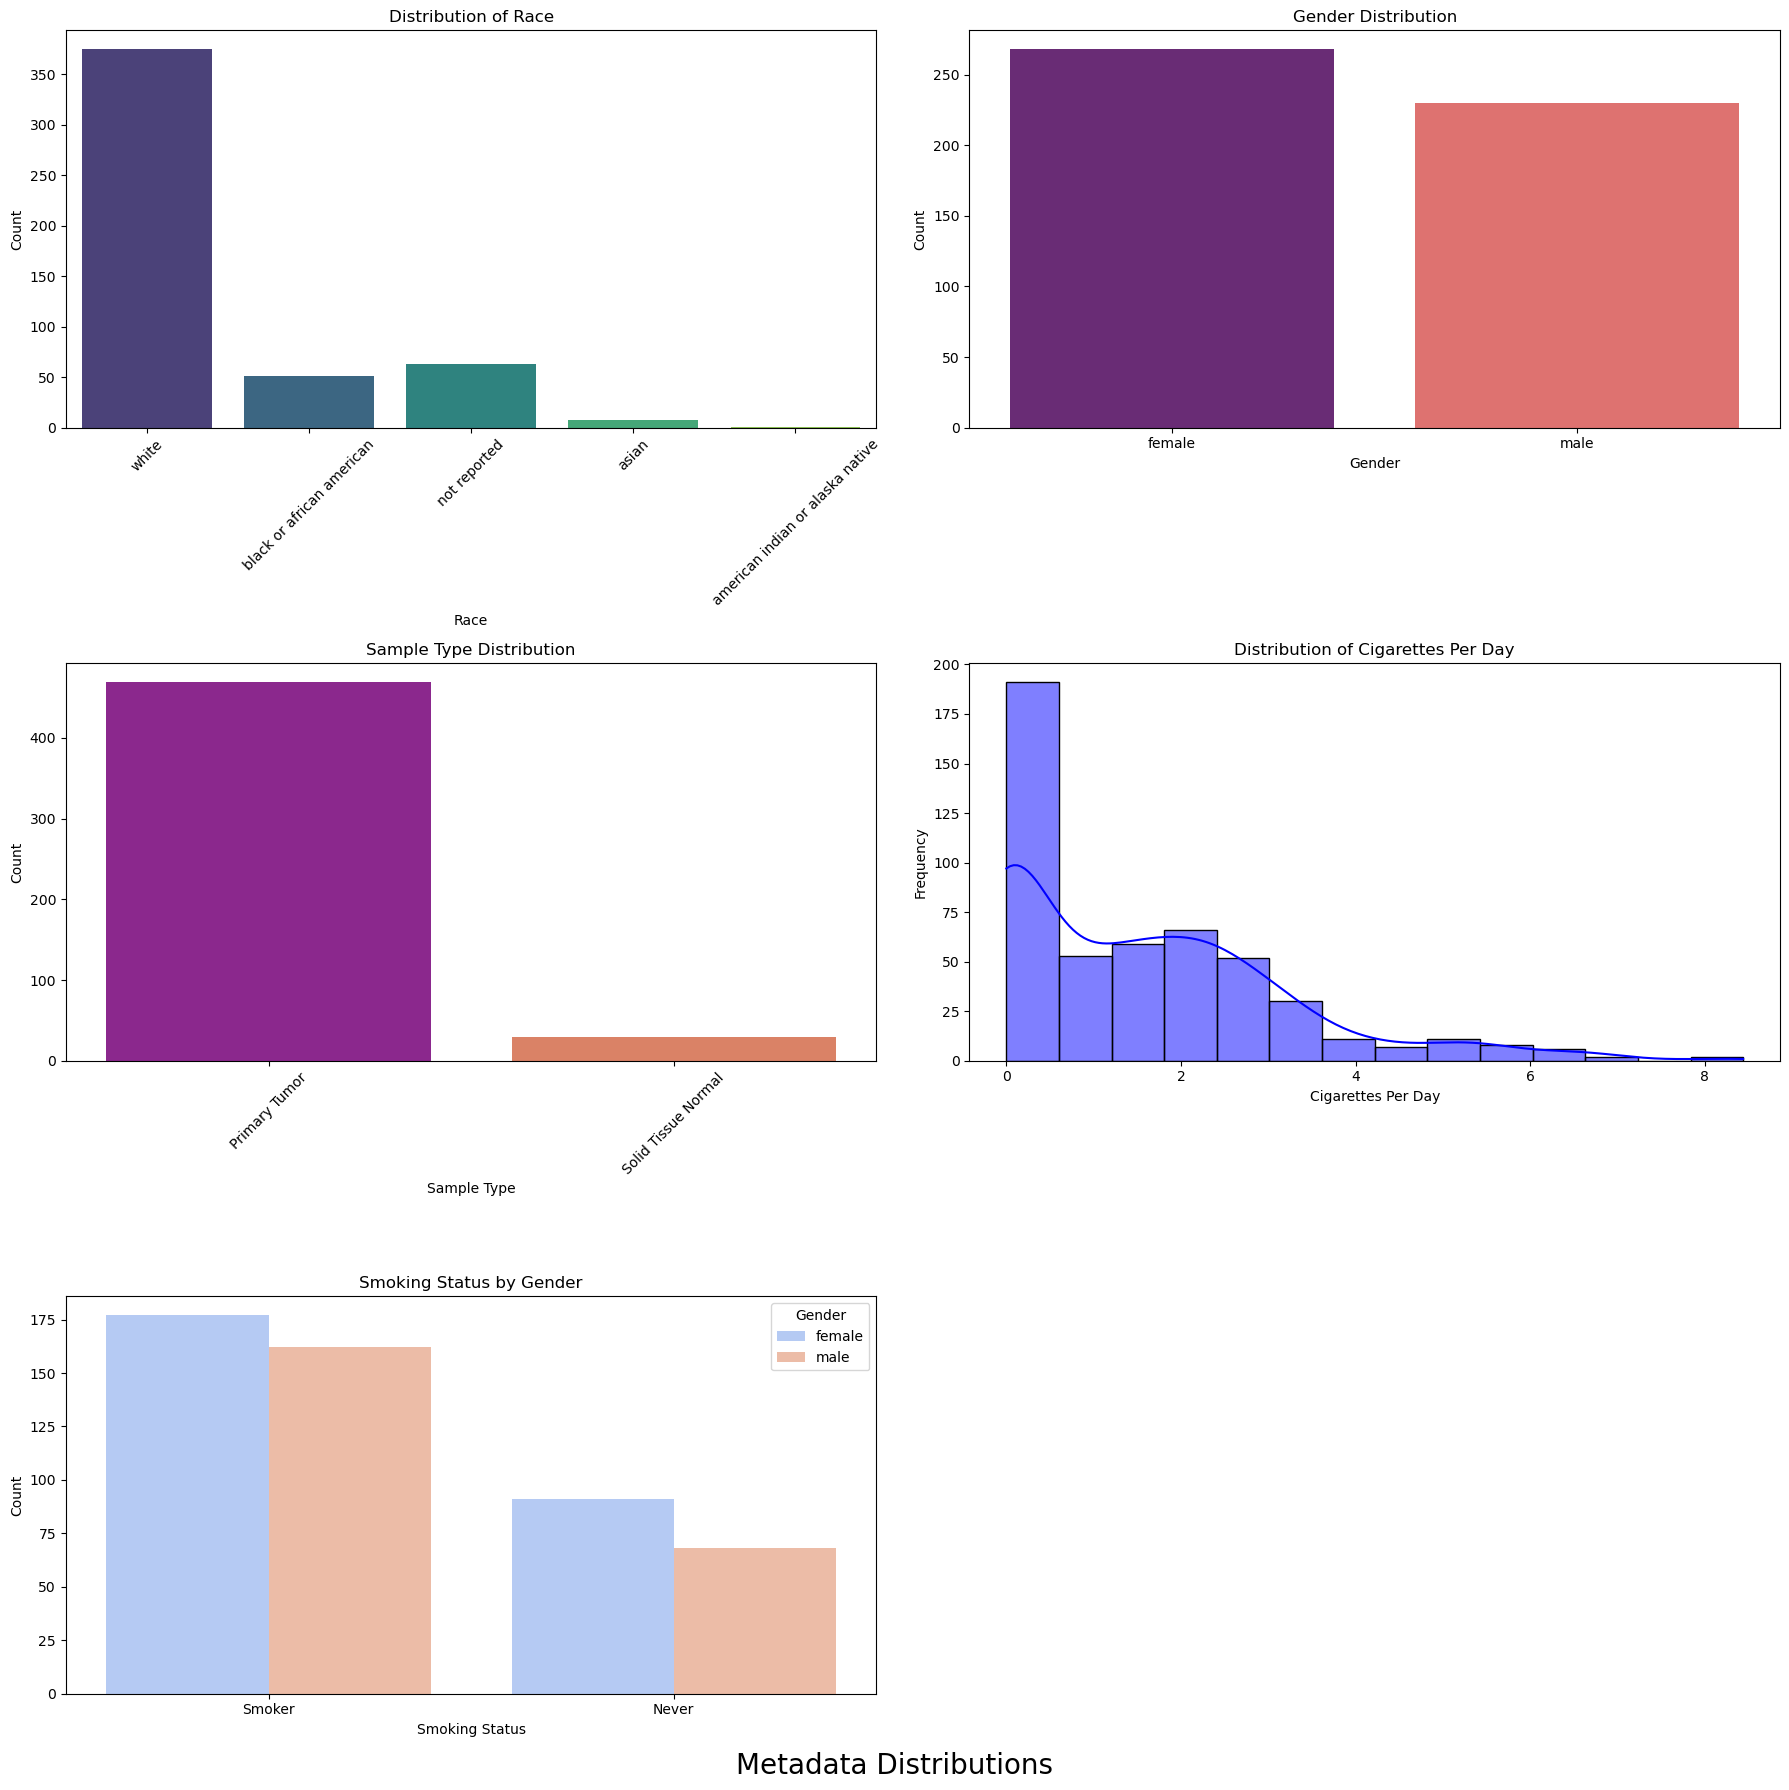

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes for a 2-column layout
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Metadata Distributions', fontsize=20, y=0)

# Plot 1: Distribution of Race
sns.countplot(ax=axes[0, 0], x='race', data=data['datMeta'], palette='viridis')
axes[0, 0].set_title('Distribution of Race')
axes[0, 0].set_xlabel('Race')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Gender Distribution
sns.countplot(ax=axes[0, 1], x='gender', data=data['datMeta'], palette='magma')
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# Plot 3: Sample Type Distribution
sns.countplot(ax=axes[1, 0], x='sample_type', data=data['datMeta'], palette='plasma')
axes[1, 0].set_title('Sample Type Distribution')
axes[1, 0].set_xlabel('Sample Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Distribution of Cigarettes Per Day
sns.histplot(ax=axes[1, 1], data=data['datMeta']['cigarettes_per_day'], kde=True, color='blue')
axes[1, 1].set_title('Distribution of Cigarettes Per Day')
axes[1, 1].set_xlabel('Cigarettes Per Day')
axes[1, 1].set_ylabel('Frequency')

# Plot 5: Smoking Status by Gender
sns.countplot(ax=axes[2, 0], x='Smoked', hue='gender', data=data['datMeta'], palette='coolwarm')
axes[2, 0].set_title('Smoking Status by Gender')
axes[2, 0].set_xlabel('Smoking Status')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Gender')

# Hide the empty subplot
axes[2, 1].axis('off')

# Adjust layout for better fit
plt.tight_layout()
plt.show()


In [10]:
expression_data = data["datExpr"]
expression_data

_row         ENSG00000000003.15 ENSG00000000419.13 ENSG00000000457.14  \
TCGA-38-7271            11.3668            10.3673             9.7884   
TCGA-55-7914            11.5434            10.5282             9.7292   
TCGA-95-7043             11.411            11.2018             9.4449   
TCGA-73-4658            12.2149            10.3249              9.234   
TCGA-86-8076            11.2882            10.2095             9.8186   
...                         ...                ...                ...   
TCGA-86-8073            10.7676            10.5503             9.0277   
TCGA-MN-A4N4             11.656            11.0739             9.5578   
TCGA-53-7626            10.8912            10.1742             9.6307   
TCGA-44-A47G              11.32             9.9137             9.3312   
TCGA-55-6969            10.5764            10.9022             9.3425   

_row         ENSG00000000460.17 ENSG00000000938.13 ENSG00000000971.16  \
TCGA-38-7271             8.2552            10.6173            12.8447   
TCGA-55-7914             7.9951             8.4858            10.4696   
TCGA-95-7043             8.3546             7.3211            10.7856   
TCGA-73-4658             7.7537            11.0656            12.3631   
TCGA-86-8076             7.9844            10.5213            13.7848   
...                         ...                ...                ...   
TCGA-86-8073             8.2811             9.9471            11.8641   
TCGA-MN-A4N4             8.7883             8.9532            11.0791   
TCGA-53-7626             8.0179            10.6328             11.247   
TCGA-44-A47G             7.8703            11.3029            12.8687   
TCGA-55-6969             8.8147             9.6115            12.3155   

_row         ENSG00000001036.14 ENSG00000001084.13 ENSG00000001167.14  \
TCGA-38-7271            10.8836            10.4437            10.8112   
TCGA-55-7914            10.4737             7.9065            11.8983   
TCGA-95-7043            11.6185            14.1836            10.8329   
TCGA-73-4658            10.9023              10.06            11.2092   
TCGA-86-8076            11.2318            10.8315            10.5784   
...                         ...                ...                ...   
TCGA-86-8073             11.237            14.2843            10.9497   
TCGA-MN-A4N4            10.5202             11.331            11.3659   
TCGA-53-7626            10.4815             9.8428            10.5795   
TCGA-44-A47G            11.2659            12.4677            10.9404   
TCGA-55-6969             11.216            11.1273             10.311   

_row         ENSG00000001460.18  ... ENSG00000288586.1 ENSG00000288596.2  \
TCGA-38-7271             9.1178  ...            4.4411            5.6909   
TCGA-55-7914             8.5842  ...             4.768            8.0948   
TCGA-95-7043             8.8155  ...            4.2248            7.3539   
TCGA-73-4658             9.0663  ...            4.2146            6.0253   
TCGA-86-8076             9.6428  ...            4.7844            6.8675   
...                         ...  ...               ...               ...   
TCGA-86-8073             8.8266  ...            4.2611             7.157   
TCGA-MN-A4N4             8.8701  ...            4.3317            7.6037   
TCGA-53-7626               9.86  ...            5.6458            6.6984   
TCGA-44-A47G             9.4188  ...            4.6125            8.0939   
TCGA-55-6969              9.123  ...            5.9603            7.2623   

_row         ENSG00000288598.1 ENSG00000288611.1 ENSG00000288612.1  \
TCGA-38-7271            3.8172            5.5378            4.5573   
TCGA-55-7914            4.2182            3.5233             4.975   
TCGA-95-7043            5.0121            4.2248            4.8311   
TCGA-73-4658            3.8231            4.0984            4.6727   
TCGA-86-8076            4.5078            2.4821            5.1468   
...                        ...      

498 rows × 22637 columns is a quite large matrix, thus we have to consider reducing the dimensionality.


# Filtering before calculating the correlation matrices  

- Filter by Variance: Select genes with high variance across samples, as low variance genes might not contribute significantly to the analysis.
- 
Filter by Mean Expression: Select genes with high mean expression levels
- 
Use Principal Component Analysis (PCA): Reduce the dimensionality of the data using PCA before computing correlations.

In [11]:
# Ensure all columns are numeric
expression_data = expression_data.apply(pd.to_numeric, errors='coerce')

# Drop columns that could not be converted to numeric (if any)
expression_data = expression_data.dropna(axis=1, how='all')

In [12]:
expression_data.shape

(498, 22637)

In [13]:
print(f"Number of duplicate indices: {expression_data.index.duplicated().sum()}")  # Should be 0
print(f"Number of duplicate columns: {expression_data.columns.duplicated().sum()}")  # Should be 0


Number of duplicate indices: 0
Number of duplicate columns: 0


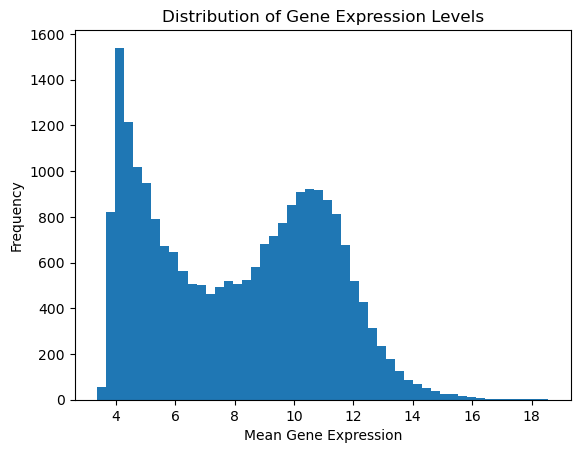

In [14]:
# Plot the distribution of gene expression levels and choose a threshold to exclude low-expressed genes.
gene_means = expression_data.mean(axis=0)
plt.hist(gene_means, bins=50)
plt.xlabel('Mean Gene Expression')
plt.ylabel('Frequency')
plt.title('Distribution of Gene Expression Levels')
plt.show()


In [15]:
def filter_low_expression_genes(data, threshold=1.0):
    # Calculate the mean expression for each gene
    gene_means = data.mean(axis=0)
    # Filter out genes with mean expression below the threshold
    mask = gene_means >= threshold
    filtered_data = data.loc[:, mask]
    return filtered_data

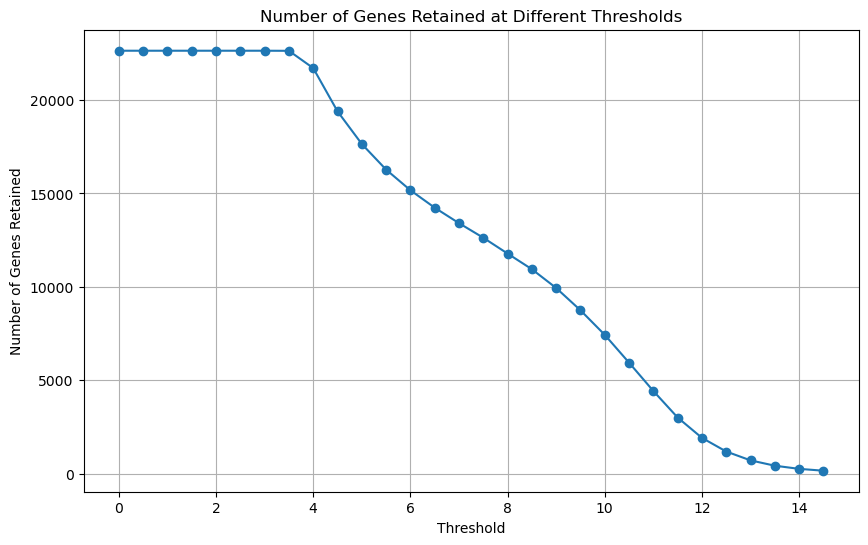

In [16]:
# Define a range of thresholds
thresholds = np.arange(0, 15, 0.5)

# List to store the number of genes retained at each threshold
num_genes = []

# Assuming df_renamed is your DataFrame with gene expression data
for threshold in thresholds:
    df_filtered = filter_low_expression_genes(expression_data, threshold)
    num_genes.append(df_filtered.shape[1])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, num_genes, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Number of Genes Retained')
plt.title('Number of Genes Retained at Different Thresholds')
plt.grid(True)
plt.show()

Based on these two diagrams, let's choose threshold 9

In [17]:
# Assuming df_renamed is your DataFrame with gene expression data
df_filtered_expression = filter_low_expression_genes(expression_data, threshold=9)
print(f"Filtered data shape: {df_filtered_expression.shape}")  # Check the new shape to confirm filtering

Filtered data shape: (498, 9938)


In [18]:
def filter_high_variance_genes(data, threshold):
    """
    Filters out genes (columns) with variance below the specified threshold.

    Parameters:
    data (pd.DataFrame): DataFrame with gene expression data where rows are samples and columns are genes.
    threshold (float): Minimum variance level to keep a gene.

    Returns:
    pd.DataFrame: Filtered DataFrame with genes having variance above the threshold.
    """
    # Calculate the variance for each gene (column)
    gene_variances = data.var(axis=0)
    # Create a boolean mask to filter out genes with variance below the threshold
    mask = gene_variances >= threshold
    # Apply the mask to filter the DataFrame
    filtered_data = data.loc[:, mask]
    return filtered_data


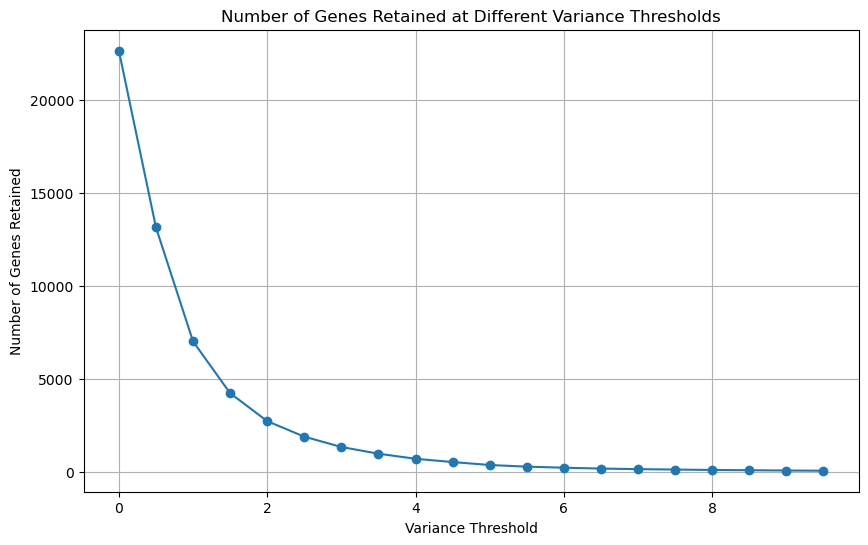

In [191]:
# Define a range of variance thresholds
variance_thresholds = np.arange(0, 10, 0.5)

# List to store the number of genes retained at each threshold
num_genes = []

# Assuming df_renamed is your DataFrame with gene expression data
for threshold in variance_thresholds:
    df_filtered = filter_high_variance_genes(expression_data, threshold)
    num_genes.append(df_filtered.shape[1])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(variance_thresholds, num_genes, marker='o')
plt.xlabel('Variance Threshold')
plt.ylabel('Number of Genes Retained')
plt.title('Number of Genes Retained at Different Variance Thresholds')
plt.grid(True)
plt.show()

In [20]:
# Step 2: Filter based on variance
df_filtered_variance = filter_high_variance_genes(df_filtered_expression, threshold = 0.7)
print(f"Filtered data shape: {df_filtered_variance.shape}")  # Check the new shape to confirm filtering

Filtered data shape: (498, 2543)


In [21]:
df_filtered_variance.describe()

_row   ENSG00000000938.13  ENSG00000000971.16  ENSG00000001084.13  \
count          498.000000          498.000000          498.000000   
mean             9.889458           11.913815           11.026005   
std              1.107214            1.144649            1.683348   
min              6.998700            8.726900            6.894200   
25%              9.242600           11.188100            9.844800   
50%              9.832450           11.958200           10.814250   
75%             10.556050           12.715050           11.974150   
max             13.765300           15.805400           16.039600   

_row   ENSG00000001617.12  ENSG00000002587.10  ENSG00000002933.9  \
count          498.000000          498.000000         498.000000   
mean            10.587472            9.639334          11.379190   
std              0.913826            1.299121           1.206815   
min              6.938500            5.339800           8.184700   
25%              9.991475            8.761200          10.617825   
50%             10.570250            9.597800          11.272100   
75%             11.099200           10.573650          12.158850   
max             14.668400           13.773600          15.123700   

_row   ENSG00000003249.15  ENSG00000003436.16  ENSG00000003989.18  \
count          498.000000          498.000000          498.000000   
mean            10.305857           12.464504           10.871297   
std              1.026016            1.431349            2.153649   
min              3.959400            8.135700            5.570000   
25%              9.711425           11.532075            9.169175   
50%             10.442100           12.475150           10.679900   
75%             10.971375           13.424050           12.501000   
max             12.960000           16.461600           16.506900   

_row   ENSG00000004468.13  ...  ENSG00000275993.3  ENSG00000276168.1  \
count          498.000000  ...         498.000000         498.000000   
mean             9.635965  ...           9.349827          11.396387   
std              1.373490  ...           1.606049           1.372040   
min              4.293000  ...           3.495500           8.227600   
25%              8.771100  ...           8.271400          10.622675   
50%              9.683600  ...           9.302300          11.383100   
75%             10.575575  ...          10.644325          12.032800   
max             13.377000  ...          13.550600          22.536700   

_row   ENSG00000276550.4  ENSG00000276600.5  ENSG00000277734.8  \
count         498.000000         498.000000         498.000000   
mean            9.434558           9.693509          10.250798   
std             1.281720           1.380215           1.135164   
min             5.633900           6.104500           5.599600   
25%             8.591450           8.774000           9.475900   
50%             9.567950           9.758900          10.315850   
75%            10.396100          10.594500          11.067575   
max            12.123000          13.589100          12.910500   

_row   ENSG00000278196.3  ENSG00000279483.2  ENSG00000280411.1  \
count         498.000000         498.000000         498.000000   
mean            9.492962           9.054505           9.459002   
std             2.028517           1.025095           2.228748   
min             3.660600           4.512300           3.856500   
25%             8.009450           8.499525           7.888750   
50%             9.582150           9.049800           9.494500   
75%            10.920125           9.701525          11.058200   
max            14.963300          12.116000          14.981900   

_row   ENSG00000283041.1  ENSG00000287263.1  
count         498.000000         498.000000  
mean            9.015976           9.210173  
std             0.934904           1.328298  
min             6.554100           6.198700  
25%             8.352275           8.280850  
50%             9.024100    

# ENSG to HGCN gene symbol

In [22]:
import mygene

def rename_ensembl_to_gene_names(df, chunk_size=1000):
    """
    Renames Ensembl gene IDs to gene names using mygene.
    
    Parameters:
    df (pd.DataFrame): DataFrame with Ensembl gene IDs as columns.
    chunk_size (int): Number of Ensembl IDs to query at a time.
    
    Returns:
    pd.DataFrame: DataFrame with gene names as columns, excluding genes that couldn't be mapped.
    """
    
    # Make a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Remove the `.number` suffix from ENSG IDs
    df_copy.columns = df_copy.columns.str.split('.').str[0]

    # Initialize mygene client
    mg = mygene.MyGeneInfo()

    # Split ENSG IDs into smaller chunks
    def chunks(lst, n):
        """Yield successive n-sized chunks from lst."""
        for i in range(0, len(lst), n):
            yield lst[i:i + n]

    ensg_ids = df_copy.columns.tolist()
    gene_mappings = []

    for chunk in chunks(ensg_ids, chunk_size):
        result = mg.querymany(chunk, scopes='ensembl.gene', fields='symbol', species='human')
        gene_mappings.extend(result)

    # Create a mapping from ENSG to gene symbol, handle missing mappings
    ensg_to_gene = {item['query']: item.get('symbol', None) for item in gene_mappings}
    
    # Log the unmapped genes
    unmapped_genes = [gene for gene in ensg_ids if ensg_to_gene.get(gene) is None]
    if unmapped_genes:
        print(f"Unmapped genes: {unmapped_genes}")

    # Filter out genes that couldn't be mapped
    mapped_columns = [ensg_to_gene[ensg] for ensg in df_copy.columns if ensg_to_gene[ensg] is not None]

    # Filter the DataFrame to only include columns that have been mapped
    df_filtered = df_copy.loc[:, df_copy.columns.isin(ensg_to_gene.keys())]

    # Further filter to ensure we have the same number of columns as mapped gene names
    df_filtered = df_filtered.loc[:, [ensg for ensg in df_filtered.columns if ensg_to_gene[ensg] is not None]]

    # Assign new column names
    df_filtered.columns = [ensg_to_gene[ensg] for ensg in df_filtered.columns]

    # Handle duplicate gene names by aggregating them (e.g., by taking the mean)
    df_final = df_filtered.T.groupby(df_filtered.columns).mean().T

    return df_final

In [23]:
df_renamed = rename_ensembl_to_gene_names(df_filtered_variance)

1 input query terms found no hit:	['ENSG00000112096']


Unmapped genes: ['ENSG00000112096', 'ENSG00000230551', 'ENSG00000237550', 'ENSG00000279483']


In [24]:
df_filtered_variance.shape

(498, 2543)

In [25]:
df_renamed.shape

(498, 2539)

In [26]:
df_renamed.head()

A2M   A4GALT     AASS     AATK     ABAT    ABCA1    ABCA3  \
TCGA-38-7271  17.7492  10.1862  11.2890   8.6552   9.3090  11.6549  14.7719   
TCGA-55-7914  14.8513   8.9312  10.5920   8.2660   8.7082  11.4592  14.4695   
TCGA-95-7043  14.1691   9.0834  10.5600   8.8214  10.4276  10.5081  12.5230   
TCGA-73-4658  16.7238   9.1443  10.5574   7.8940   9.0129  11.7183  13.7542   
TCGA-86-8076  15.6783   9.5150  10.3567  10.4765  10.0012  11.6653  13.2599   

                ABCA5    ABCA7    ABCC3  ...  ZNF528  ZNF542P  ZNF608  \
TCGA-38-7271   8.4864  10.0852  12.5540  ...  8.4655   9.0863  9.4605   
TCGA-55-7914   8.0347  10.2805  13.7737  ...  8.9520   6.9226  9.8560   
TCGA-95-7043  10.3175   8.2187  14.9542  ...  7.7241   6.9648  8.0587   
TCGA-73-4658   7.3455  10.1906  12.4963  ...  7.8461   9.0593  8.4540   
TCGA-86-8076   9.6646  11.8002  12.2218  ...  8.0522   9.2877  9.9354   

               ZNF692   ZNF703   ZNF704   ZNF710  ZSCAN18  ZSCAN31    ZWINT  
TCGA-38-7271   8.9876  10.0177  10.4701  10.4908   9.5323   9.0817   9.2615  
TCGA-55-7914  10.4064  11.8623  10.4383  10.6423  10.3934  10.9565  10.1334  
TCGA-95-7043   9.6337  15.9172  10.5026   9.5442  10.1984  10.8095  10.9149  
TCGA-73-4658   9.0452  10.1434   9.5153  10.9877   8.7077   8.9874   9.7828  
TCGA-86-8076  10.3185  10.1469  10.1274  11.0332   8.8800   9.5810   8.6640  

[5 rows x 2539 columns]

In [204]:
df_renamed.to_csv("expression_data_filtered.csv", index=True)

## Check for NA, handling missing data, outlier check

In [27]:
# Check for missing values in each column
missing_values = df_renamed.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(data)) * 100

# Create a DataFrame to hold the missing data statistics
missing_stats = pd.DataFrame({'Total Missing': missing_values, 'Percentage': missing_percentage})

# Filter to display only columns with missing values
missing_stats = missing_stats[missing_stats['Total Missing'] > 0]

# Print out the missing values statistics for columns with missing data
if not missing_stats.empty:
    print("Missing values in columns:")
    print(missing_stats)
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


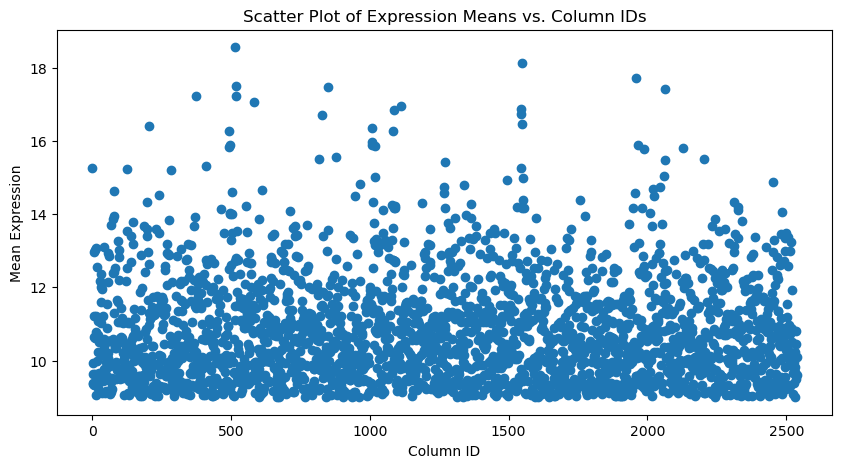

In [28]:
# Calculate the mean of each column
means = df_renamed.mean()

# Create a list of column IDs (integer index)
column_ids = np.arange(len(df_renamed.columns))

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(column_ids, means)

# Labeling the axes
plt.xlabel('Column ID')
plt.ylabel('Mean Expression')

# Adding a title
plt.title('Scatter Plot of Expression Means vs. Column IDs')

# Adjust xticks to label each point with the corresponding column name
#plt.xticks(column_ids, df.columns)

plt.show()

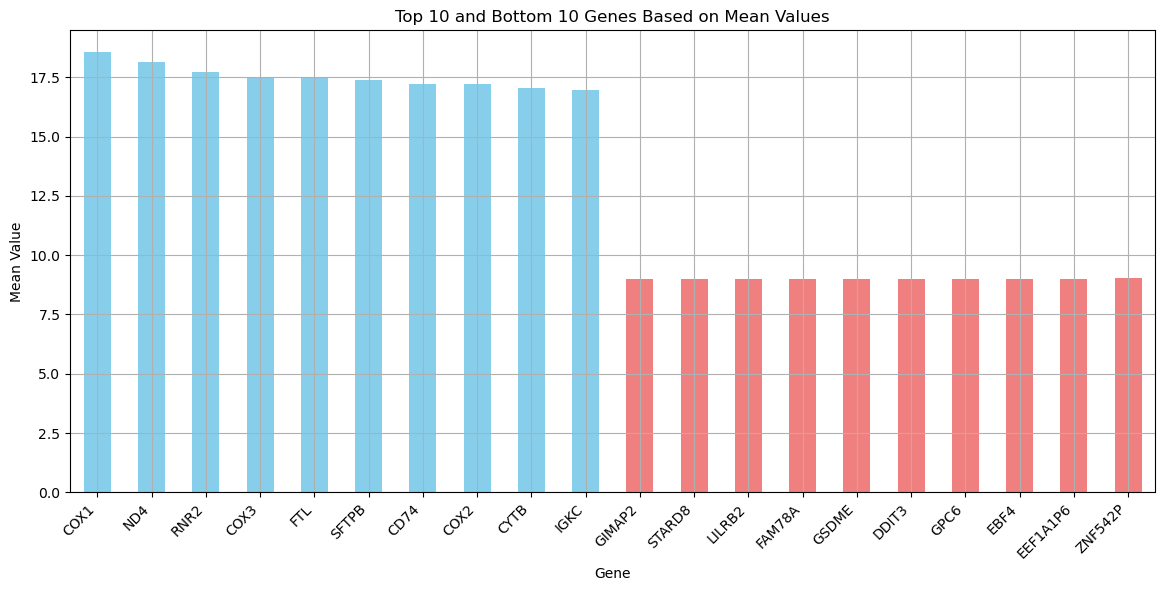

In [29]:
# Calculate means for each column
means = df_renamed.mean()

# Sort and get the top 10 and bottom 10 columns based on their mean values
top_10_columns = means.sort_values(ascending=False).head(10)
bottom_10_columns = means.sort_values(ascending=True).head(10)

# Combine top 10 and bottom 10 columns into one DataFrame
combined = pd.concat([top_10_columns, bottom_10_columns])

# Plot the results
plt.figure(figsize=(14, 6))
combined.plot(kind='bar', color=['skyblue' if i < 10 else 'lightcoral' for i in range(20)])
plt.title('Top 10 and Bottom 10 Genes Based on Mean Values')
plt.ylabel('Mean Value')
plt.xlabel('Gene')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## Handling Missing data ??
### TODO: low priority

## Data heterogeneity

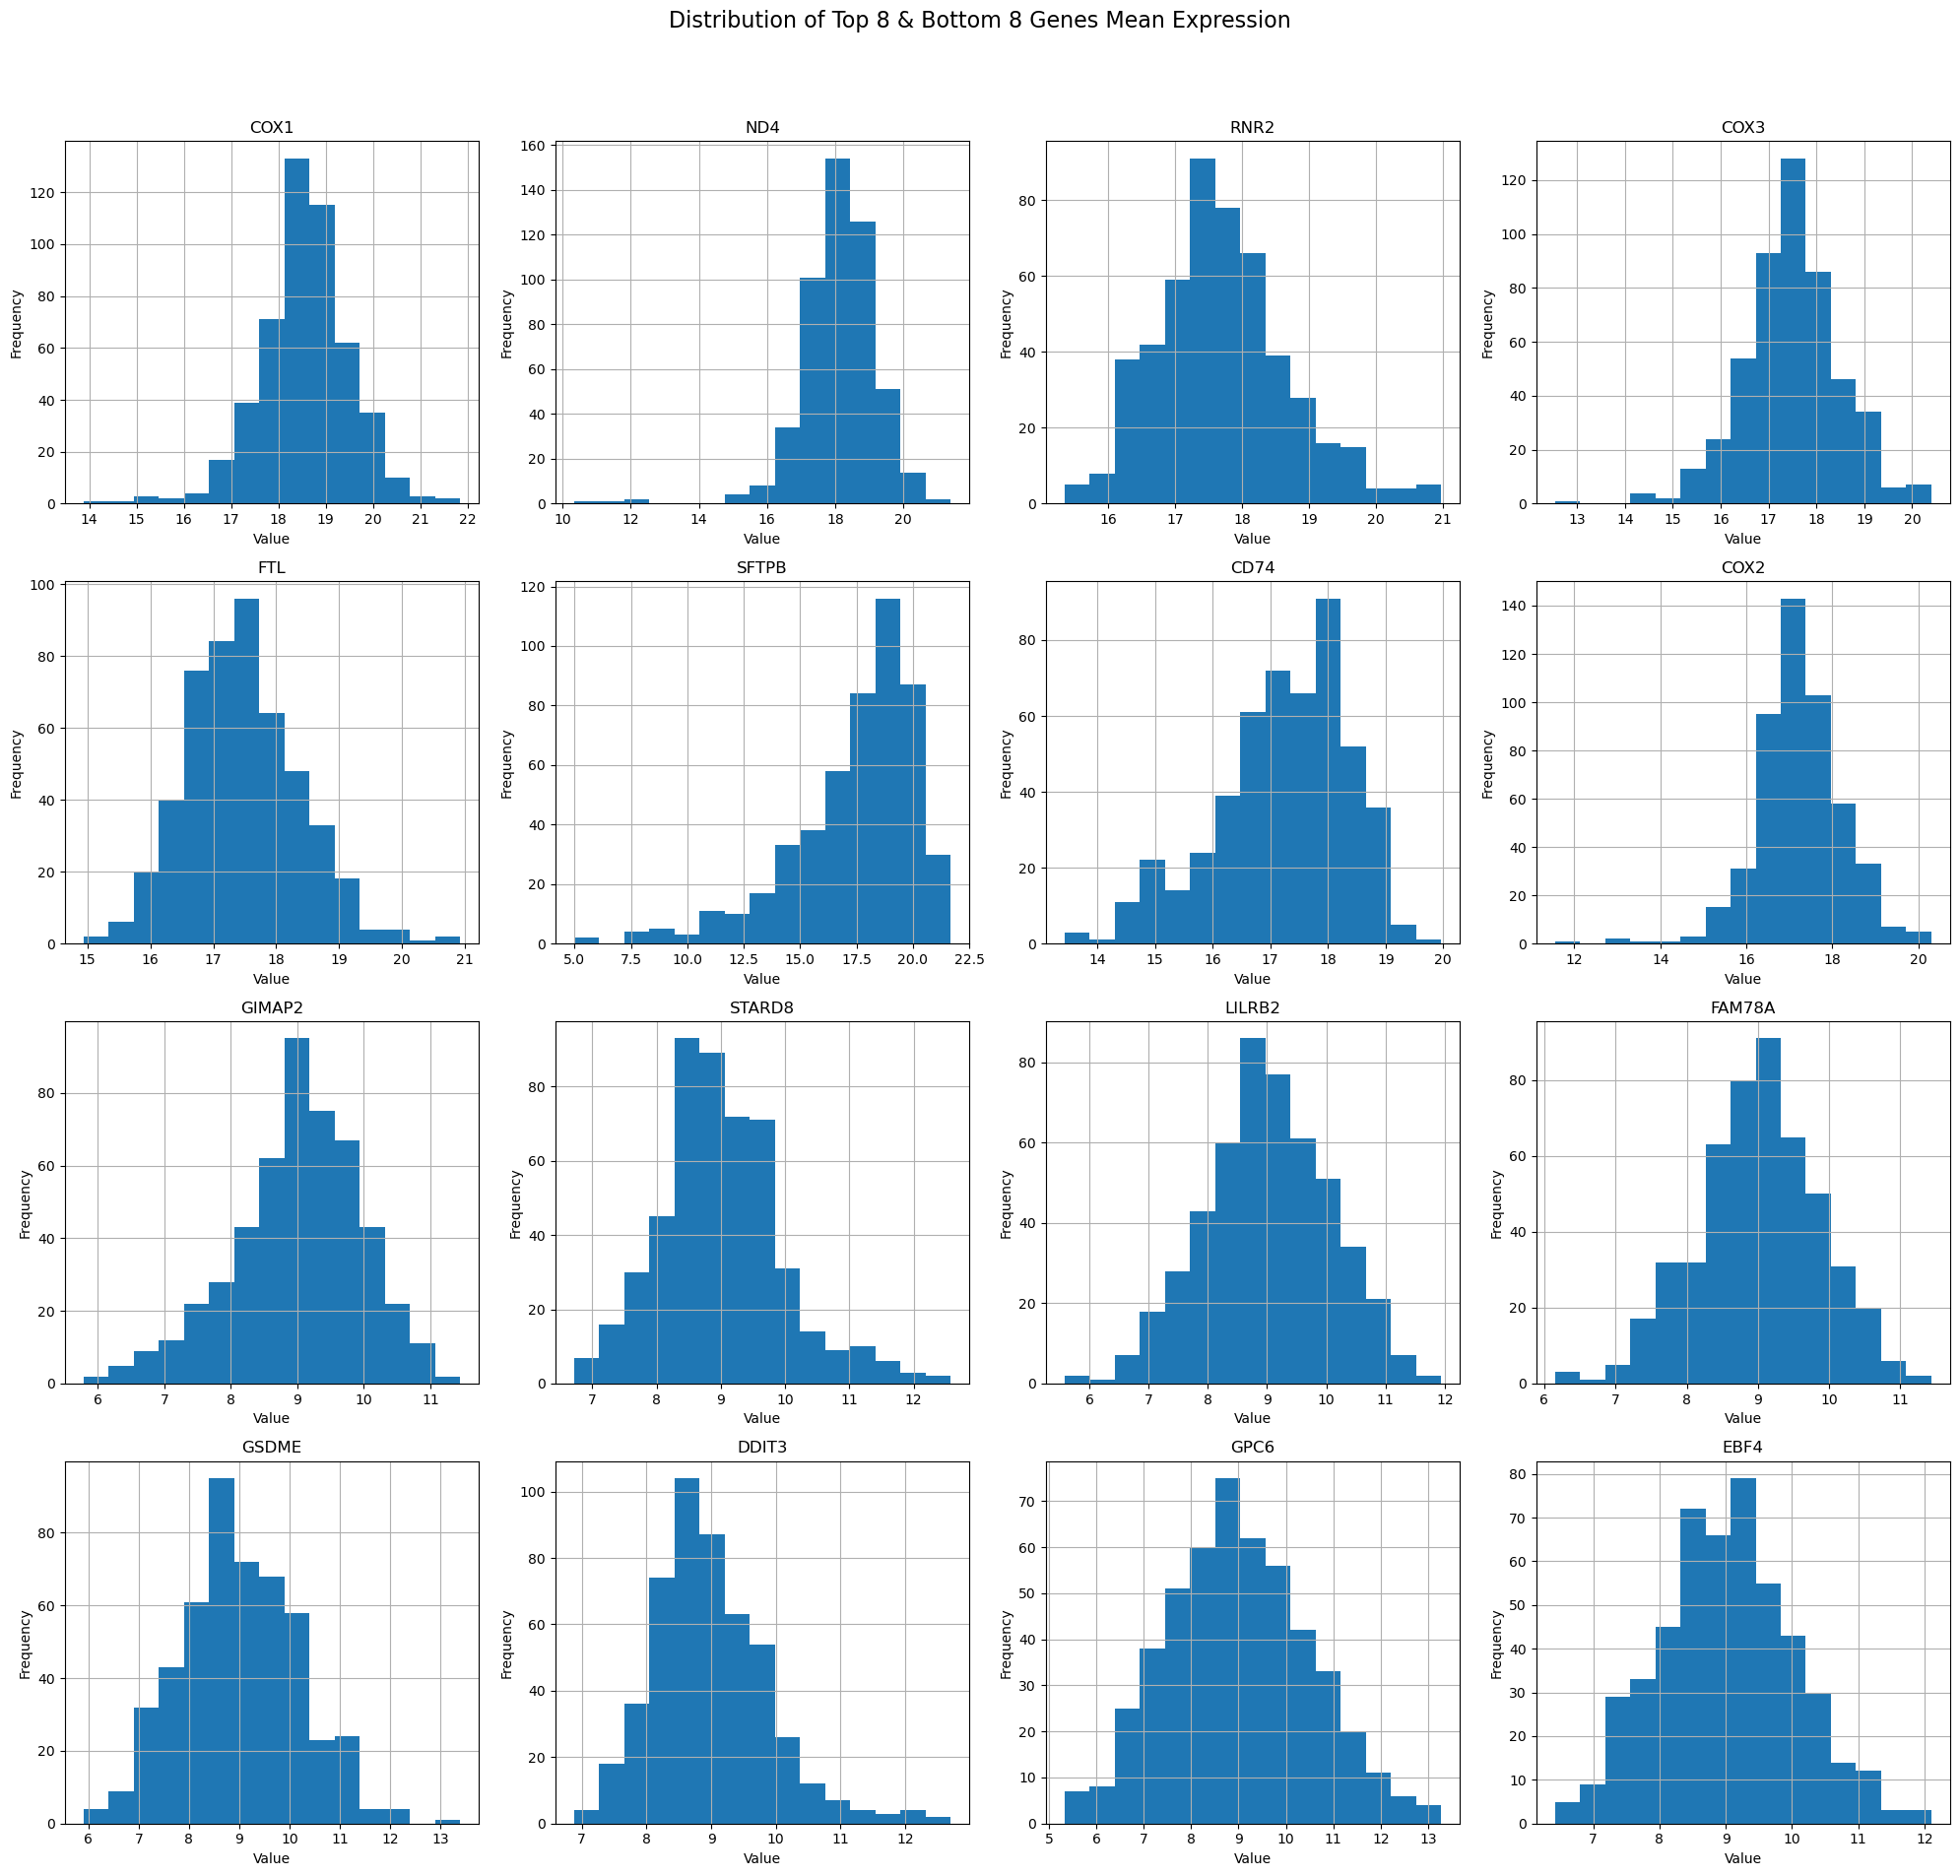

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume expression_data is already loaded
# Select numerical columns
numerical_columns = df_renamed.select_dtypes(include=['float64', 'int64'])

# Calculate the mean of each column for the numerical columns only
means = numerical_columns.mean()

# Get the top 10 and bottom 10 columns based on mean values
top_8_columns = means.nlargest(8).index.tolist()
bottom_8_columns = means.nsmallest(8).index.tolist()

# Combine top 10 and bottom 10 columns for plotting
columns_to_plot = top_8_columns + bottom_8_columns

# Filter the numerical columns to only include those to plot
filtered_numerical_columns = numerical_columns[columns_to_plot]

# Calculate the number of rows needed for subplots based on the number of selected columns
num_plots = len(filtered_numerical_columns.columns)
num_rows = (num_plots // 4) + (num_plots % 4 > 0)  # Ensure there is an extra row if there are leftovers

# Plot histograms for each selected numerical column
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))  # Adjust width and height as needed
fig.suptitle('Distribution of Top 8 & Bottom 8 Genes Mean Expression', fontsize=16)

for i, col in enumerate(filtered_numerical_columns.columns):
    ax = axes.flatten()[i]
    filtered_numerical_columns[col].hist(bins=15, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide any unused axes if the number of plots isn't a perfect multiple of 4
if num_plots % 4:
    for ax in axes.flatten()[num_plots:]:
        ax.set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()

# Calculate Correlation Matrices

In [32]:
import astropy.stats

def abs_bicorr(data):
    # Select only numeric data
    data = data._get_numeric_data()
    cols = data.columns
    idx = cols.copy()
    mat = data.to_numpy(dtype=float, na_value=np.nan, copy=False)
    mat = mat.T

    K = len(cols)
    correl = np.empty((K, K), dtype=np.float32)

    # Calculate biweight midcovariance
    bicorr = astropy.stats.biweight_midcovariance(mat, modify_sample_size=True)

    for i in range(K):
        for j in range(K):
            if i == j:
                correl[i, j] = 1.0
            else:
                denominator = np.sqrt(bicorr[i, i] * bicorr[j, j])
                if denominator != 0:
                    correl[i, j] = bicorr[i, j] / denominator
                else:
                    correl[i, j] = 0  # Or handle it in another appropriate way

    return pd.DataFrame(data=np.abs(correl), index=idx, columns=cols, dtype=np.float32)

In [33]:
from sklearn.feature_selection import mutual_info_regression

# Function to calculate mutual information
def mutual_information(df):
    mi = pd.DataFrame(index=df.columns, columns=df.columns)
    for i in range(len(df.columns)):
        for j in range(len(df.columns)):
            if i != j:
                mi.iloc[i, j] = mutual_info_regression(df.iloc[:, i].values.reshape(-1, 1), df.iloc[:, j].values)[0]
            else:
                mi.iloc[i, j] = 1.0
    return mi.astype(float)


In [34]:
# Dictionary to store different correlation matrices
correlation_matrices = {}

# Pearson correlation
correlation_matrices['pearson'] = df_renamed.corr(method='pearson')

# Spearman rank correlation
correlation_matrices['spearman'] = df_renamed.corr(method='spearman')

# Biweight midcorrelation
correlation_matrices['biweight_midcorrelation'] = abs_bicorr(df_renamed)

# Mutual information - slow O(n3)
# correlation_matrices['mutual_information'] = mutual_information(df_renamed)

# Print the keys of the correlation matrices to verify
print("Correlation matrices calculated:")
print(correlation_matrices.keys())

Correlation matrices calculated:
dict_keys(['pearson', 'spearman', 'biweight_midcorrelation'])


In [38]:
# Visualize correlation matrices using heatmaps
def plot_correlation_matrices(correlation_matrices):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust to 1 row and 3 columns
    axes = axes.flatten()
    
    for i, (key, matrix) in enumerate(correlation_matrices.items()):
        sns.heatmap(matrix, ax=axes[i], cmap='coolwarm', cbar=True, xticklabels=False, yticklabels=False)
        axes[i].set_title(f'{key.capitalize()} Correlation Matrix')
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

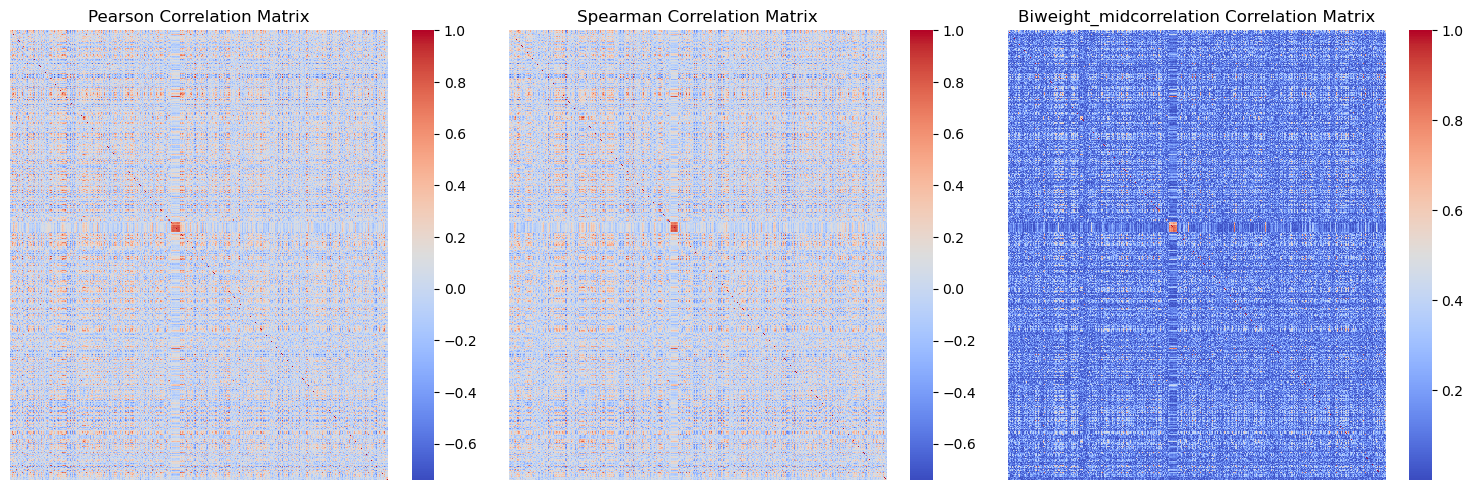

In [39]:
plot_correlation_matrices(correlation_matrices)


In [41]:
correlation_matrices['pearson'].shape

(2539, 2539)

# TODO: remove eye()

In [50]:
# Save the entire dictionary of correlation matrices as a pickle file
with open(r"C:\cdt_data\ismb_data\correlation_matrices.pkl", 'wb') as f:
    pickle.dump(correlation_matrices, f)

# Load the entire dictionary of correlation matrices from a pickle file
with open(r"C:\cdt_data\ismb_data\correlation_matrices.pkl", 'rb') as f:
    loaded_correlation_matrices = pickle.load(f)

# Verify the loaded data
print(loaded_correlation_matrices.keys())

dict_keys(['pearson', 'spearman', 'biweight_midcorrelation'])


# Construct Graphs from correlation matrices

In [93]:
import networkx as nx
import pandas as pd

def create_graph_from_correlation(correlation_matrix, threshold=0.8):
    """
    Creates a graph from a correlation matrix using a specified threshold.

    Parameters:
    correlation_matrix (pd.DataFrame): DataFrame containing the correlation matrix.
    threshold (float): Threshold for including edges based on correlation value.

    Returns:
    G (nx.Graph): Graph created from the correlation matrix.
    """
    G = nx.Graph()

    # Add nodes
    for node in correlation_matrix.columns:
        G.add_node(node)

    # Add edges with weights above the threshold
    for i in range(correlation_matrix.shape[0]):
        for j in range(i + 1, correlation_matrix.shape[1]):
            weight = correlation_matrix.iloc[i, j]
            if abs(weight) >= threshold:
                G.add_edge(correlation_matrix.index[i], correlation_matrix.columns[j], weight=weight)

    return G

In [105]:
def verify_edge_weights(G, num_samples=10):
    """
    Verifies that edges in the graph have the correct weights from the correlation matrix.

    Parameters:
    G (nx.Graph): The NetworkX graph.
    num_samples (int): Number of edges to sample and print for verification.
    """
    edges = list(G.edges(data=True))
    sample = edges[:num_samples] if len(edges) > num_samples else edges
    
    print(f"Sample of {len(sample)} edges with weights:")
    for u, v, data in sample:
        print(f"Edge ({u}, {v}) - weight: {data['weight']}")


In [184]:
# Example usage
# Assuming correlation_matrices is a dictionary containing your correlation matrices
pearson_graph = create_graph_from_correlation(correlation_matrices['pearson'], threshold=0.8)

In [107]:
verify_edge_weights(pearson_graph, num_samples=10)

Sample of 10 edges with weights:
Edge (A2M, AOC3) - weight: 0.8767411078325781
Edge (A2M, C7) - weight: 0.8013688242083488
Edge (A2M, ERG) - weight: 0.8094520354646654
Edge (A2M, INMT) - weight: 0.8117391230502314
Edge (A2M, ITGA8) - weight: 0.8724141478160804
Edge (A2M, LAMA2) - weight: 0.8150087035757122
Edge (A2M, MFAP4) - weight: 0.8444697225886688
Edge (A2M, SCN7A) - weight: 0.8382334505662205
Edge (A2M, SLIT2) - weight: 0.8041515706739126
Edge (A2M, SLIT3) - weight: 0.8600007155510168


In [46]:
biweight_graph = create_graph_from_correlation(correlation_matrices['biweight_midcorrelation'], threshold=0.8)

In [188]:
# Function to visualize the graph
def visualize_graph(G, title='Gene Co-expression Network'):
    """
    Visualizes the graph using Matplotlib and NetworkX.

    Parameters:
    G (nx.Graph): Graph to visualize.
    title (str): Title of the plot.
    """
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, k=0.1)  # k controls the distance between nodes
    nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue', alpha=0.7)
    nx.draw_networkx_edges(G, pos, width=0.2, alpha=0.5)
    plt.title(title)
    plt.show()

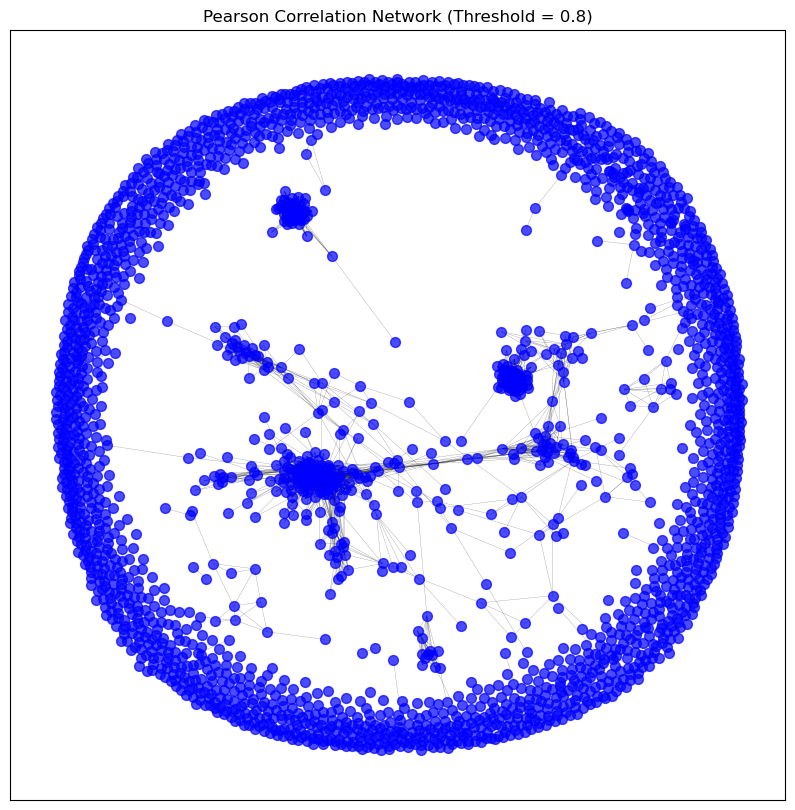

In [108]:
# Visualize the graph
visualize_graph(pearson_graph, title='Pearson Correlation Network (Threshold = 0.8)')

Removing diagonal from pearson correlation matrix
              A2M    A4GALT      AASS      AATK      ABAT     ABCA1     ABCA3  \
A2M      1.000000  0.012495  0.341113  0.333060  0.295277  0.371058  0.506376   
A4GALT   0.012495  1.000000 -0.162171 -0.118209 -0.080749  0.036949 -0.241872   
AASS     0.341113 -0.162171  1.000000  0.335342  0.248338  0.191234  0.510439   
AATK     0.333060 -0.118209  0.335342  1.000000  0.214274  0.053479  0.415078   
ABAT     0.295277 -0.080749  0.248338  0.214274  1.000000 -0.017236  0.341820   
...           ...       ...       ...       ...       ...       ...       ...   
ZNF704   0.394398 -0.033329  0.204077  0.177102  0.346451  0.000609  0.297077   
ZNF710   0.030792 -0.083872  0.152749  0.249230  0.117722 -0.024280  0.209544   
ZSCAN18  0.182082  0.021368  0.103947  0.176192  0.096126  0.051455  0.159278   
ZSCAN31 -0.090389 -0.192554 -0.062892 -0.001923  0.184607 -0.129777  0.053465   
ZWINT   -0.612124  0.110229 -0.330766 -0.493776 -0.302722 -

In [192]:
print_graph_info(pearson_graph)

Number of nodes: 2539
Number of edges: 4291
Sample nodes: ['A2M', 'A4GALT', 'AASS', 'AATK', 'ABAT', 'ABCA1', 'ABCA3', 'ABCA5', 'ABCA7', 'ABCC3']
Sample edges: [('A2M', 'AOC3', {'weight': 0.8767411078325781}), ('A2M', 'C7', {'weight': 0.8013688242083488}), ('A2M', 'ERG', {'weight': 0.8094520354646654}), ('A2M', 'INMT', {'weight': 0.8117391230502314}), ('A2M', 'ITGA8', {'weight': 0.8724141478160804}), ('A2M', 'LAMA2', {'weight': 0.8150087035757122}), ('A2M', 'MFAP4', {'weight': 0.8444697225886688}), ('A2M', 'SCN7A', {'weight': 0.8382334505662205}), ('A2M', 'SLIT2', {'weight': 0.8041515706739126}), ('A2M', 'SLIT3', {'weight': 0.8600007155510168})]


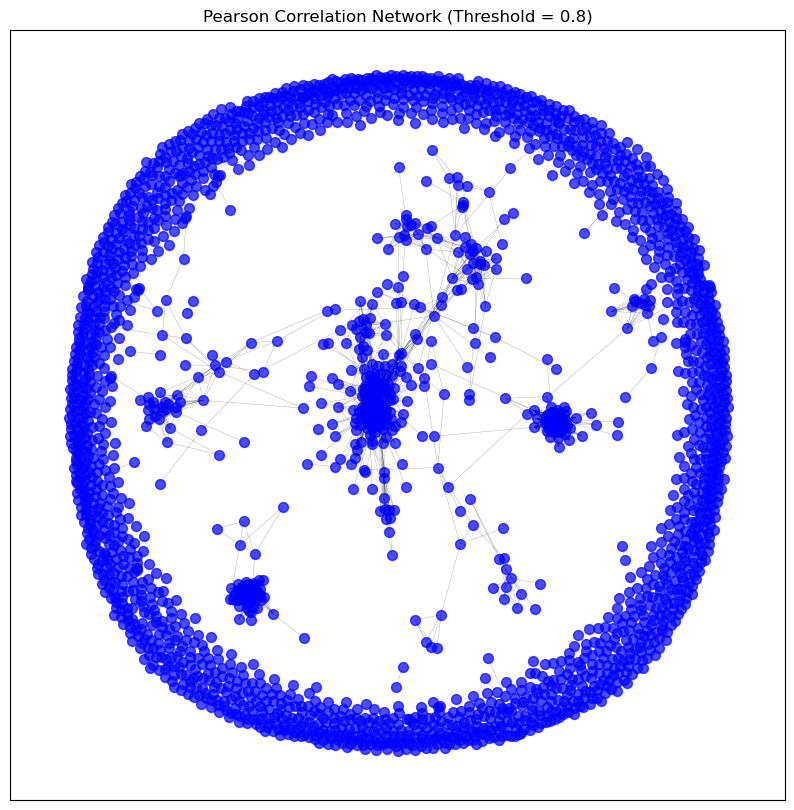

In [47]:
visualize_graph(biweight_graph, title='Biweight MidCorrelation Network (Threshold = 0.8)')

# Cleaning the network

In [179]:
def print_graph_info(G):
    """
    Prints basic information about the graph.
    
    Parameters:
    G (nx.Graph): The NetworkX graph.
    """
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print("Sample nodes:", list(G.nodes)[:10])  # Print first 10 nodes as a sample
    print("Sample edges:", list(G.edges(data=True))[:10])  # Print first 10 edges as a sample

def calculate_average_clustering(G):
    """
    Calculates and prints the average clustering coefficient of the graph.
    
    Parameters:
    G (nx.Graph): The NetworkX graph.
    """
    avg_clustering = nx.average_clustering(G)
    print(f"Average clustering coefficient: {avg_clustering}")

In [186]:
print("Graph Information:")
print_graph_info(pearson_graph)

print("\nClustering Coefficient:")
calculate_average_clustering(pearson_graph)

Graph Information:
Number of nodes: 2539
Number of edges: 4291
Sample nodes: ['A2M', 'A4GALT', 'AASS', 'AATK', 'ABAT', 'ABCA1', 'ABCA3', 'ABCA5', 'ABCA7', 'ABCC3']
Sample edges: [('A2M', 'AOC3', {'weight': 0.8767411078325781}), ('A2M', 'C7', {'weight': 0.8013688242083488}), ('A2M', 'ERG', {'weight': 0.8094520354646654}), ('A2M', 'INMT', {'weight': 0.8117391230502314}), ('A2M', 'ITGA8', {'weight': 0.8724141478160804}), ('A2M', 'LAMA2', {'weight': 0.8150087035757122}), ('A2M', 'MFAP4', {'weight': 0.8444697225886688}), ('A2M', 'SCN7A', {'weight': 0.8382334505662205}), ('A2M', 'SLIT2', {'weight': 0.8041515706739126}), ('A2M', 'SLIT3', {'weight': 0.8600007155510168})]

Clustering Coefficient:
Average clustering coefficient: 0.11740089225822176


In [180]:
def clean_graph(G, degree_threshold=1, keep_largest_component=True):
    """
    Cleans the graph by performing several cleaning steps:
    - Removes unconnected nodes (isolates)
    - Removes self-loops
    - Removes nodes with a degree below a specified threshold
    - Keeps only the largest connected component (optional)

    Parameters:
    G (nx.Graph): The NetworkX graph to clean.
    degree_threshold (int): Minimum degree for nodes to keep.
    keep_largest_component (bool): Whether to keep only the largest connected component.

    Returns:
    G (nx.Graph): Cleaned graph.
    """
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))

    # Remove nodes with no edges (isolates)
    G.remove_nodes_from(list(nx.isolates(G)))

    # Remove nodes with degree below the threshold
    low_degree_nodes = [node for node, degree in dict(G.degree()).items() if degree < degree_threshold]
    G.remove_nodes_from(low_degree_nodes)

    # Keep only the largest connected component
    if keep_largest_component:
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()

    return G

In [111]:
# Clean the graph by removing unconnected nodes
pearson_graph_cleaned = clean_graph(pearson_graph,
                                    degree_threshold=0,
                                    keep_largest_component=False)

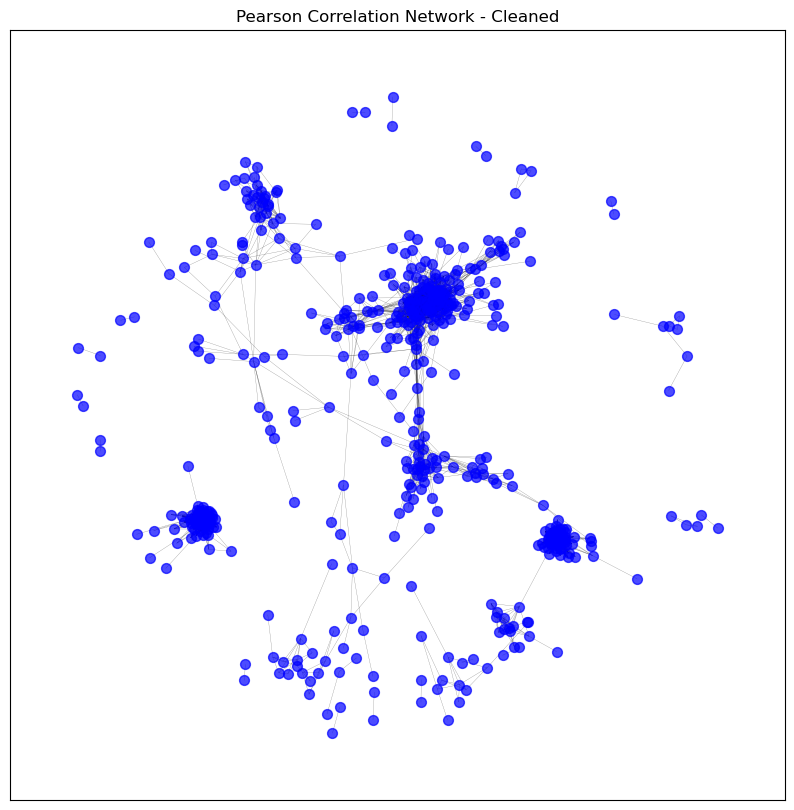

In [112]:
visualize_graph(pearson_graph_cleaned, title='Pearson Correlation Network - Cleaned')

In [194]:
print_graph_info(pearson_graph_cleaned)

Number of nodes: 500
Number of edges: 4291
Sample nodes: ['A2M', 'ABI3BP', 'ACAP1', 'ACP5', 'ACTA2', 'ACTG2', 'ACVRL1', 'ADAM12', 'ADAMTS12', 'ADAMTS2']
Sample edges: [('A2M', 'AOC3', {'weight': 0.8767411078325781}), ('A2M', 'C7', {'weight': 0.8013688242083488}), ('A2M', 'ERG', {'weight': 0.8094520354646654}), ('A2M', 'INMT', {'weight': 0.8117391230502314}), ('A2M', 'ITGA8', {'weight': 0.8724141478160804}), ('A2M', 'LAMA2', {'weight': 0.8150087035757122}), ('A2M', 'MFAP4', {'weight': 0.8444697225886688}), ('A2M', 'SCN7A', {'weight': 0.8382334505662205}), ('A2M', 'SLIT2', {'weight': 0.8041515706739126}), ('A2M', 'SLIT3', {'weight': 0.8600007155510168})]


In [116]:
# Clean the graph by removing unconnected nodes
pearson_graph_pruned = clean_graph(pearson_graph,
                                    degree_threshold=1,
                                    keep_largest_component=True)

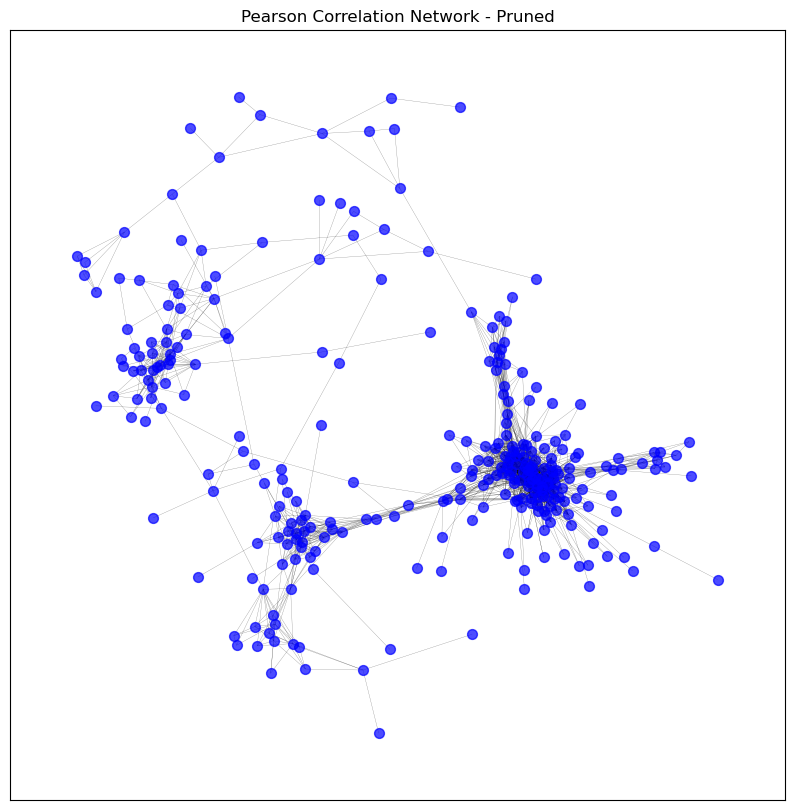

In [118]:
visualize_graph(pearson_graph_pruned, title='Pearson Correlation Network - Pruned')

In [200]:
#example
nx.write_gml(pearson_graph_pruned, 'gene_coexpression_network.gml')


In [121]:
verify_edge_weights(pearson_graph_pruned, num_samples=10)

Sample of 10 edges with weights:
Edge (A2M, AOC3) - weight: 0.8767411078325781
Edge (A2M, C7) - weight: 0.8013688242083488
Edge (A2M, ERG) - weight: 0.8094520354646654
Edge (A2M, INMT) - weight: 0.8117391230502314
Edge (A2M, ITGA8) - weight: 0.8724141478160804
Edge (A2M, LAMA2) - weight: 0.8150087035757122
Edge (A2M, MFAP4) - weight: 0.8444697225886688
Edge (A2M, SCN7A) - weight: 0.8382334505662205
Edge (A2M, SLIT2) - weight: 0.8041515706739126
Edge (A2M, SLIT3) - weight: 0.8600007155510168


In [195]:
print_graph_info(pearson_graph_pruned)

Number of nodes: 300
Number of edges: 2284
Sample nodes: ['A2M', 'ABI3BP', 'ACAP1', 'ACP5', 'ACTA2', 'ACTG2', 'ACVRL1', 'ADAM12', 'ADAMTS12', 'ADAMTS2']
Sample edges: [('A2M', 'AOC3', {'weight': 0.8767411078325781}), ('A2M', 'C7', {'weight': 0.8013688242083488}), ('A2M', 'ERG', {'weight': 0.8094520354646654}), ('A2M', 'INMT', {'weight': 0.8117391230502314}), ('A2M', 'ITGA8', {'weight': 0.8724141478160804}), ('A2M', 'LAMA2', {'weight': 0.8150087035757122}), ('A2M', 'MFAP4', {'weight': 0.8444697225886688}), ('A2M', 'SCN7A', {'weight': 0.8382334505662205}), ('A2M', 'SLIT2', {'weight': 0.8041515706739126}), ('A2M', 'SLIT3', {'weight': 0.8600007155510168})]


In [57]:
# visualize_interactive_network(pearson_graph_cleaned, output_file='pearson_network_cleaned.html')


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


# Sparsification methods

Edge Sampling: Randomly removes a fraction of edges.
Thresholding: Removes edges with weights below a certain threshold.
Degree-based Sparsification: Preserves

Graph Information:
Number of nodes: 300
Number of edges: 2284
Sample nodes: ['A2M', 'ABI3BP', 'ACAP1', 'ACP5', 'ACTA2', 'ACTG2', 'ACVRL1', 'ADAM12', 'ADAMTS12', 'ADAMTS2']
Sample edges: [('A2M', 'AOC3', {'weight': 0.8767411078325781}), ('A2M', 'C7', {'weight': 0.8013688242083488}), ('A2M', 'ERG', {'weight': 0.8094520354646654}), ('A2M', 'INMT', {'weight': 0.8117391230502314}), ('A2M', 'ITGA8', {'weight': 0.8724141478160804}), ('A2M', 'LAMA2', {'weight': 0.8150087035757122}), ('A2M', 'MFAP4', {'weight': 0.8444697225886688}), ('A2M', 'SCN7A', {'weight': 0.8382334505662205}), ('A2M', 'SLIT2', {'weight': 0.8041515706739126}), ('A2M', 'SLIT3', {'weight': 0.8600007155510168})]

Edge Attribute Check:
All edges have the 'weight' attribute.

Self-Loops and Isolates Check:
Number of self-loops: 0
Number of isolates: 0

Degree Distribution:


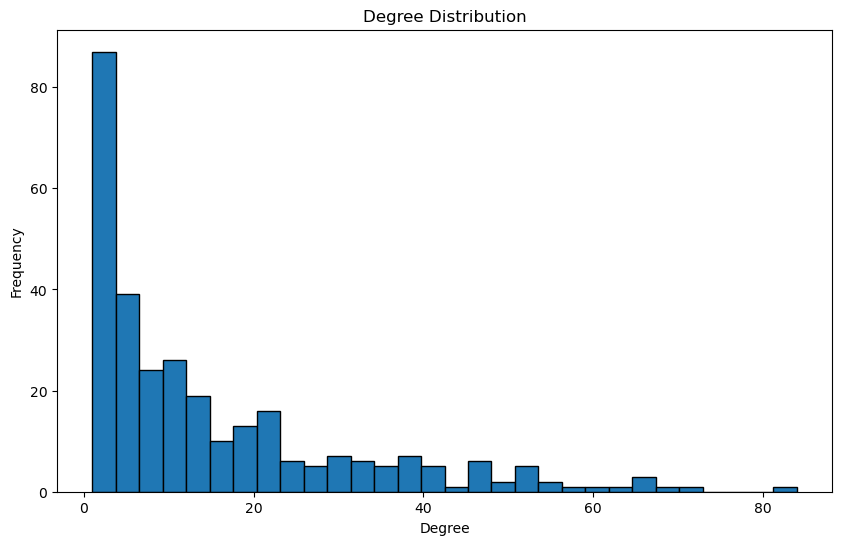


Clustering Coefficient:
Average clustering coefficient: 0.5759481981488631


In [177]:
import networkx as nx
import matplotlib.pyplot as plt


def check_edge_attributes(G, attribute='weight'):
    """
    Checks if all edges have the specified attribute.
    
    Parameters:
    G (nx.Graph): The NetworkX graph.
    attribute (str): The edge attribute to check for.
    
    Returns:
    bool: True if all edges have the attribute, False otherwise.
    """
    missing_attributes = False
    for u, v in G.edges():
        if attribute not in G[u][v]:
            print(f"Edge ({u}, {v}) is missing the '{attribute}' attribute.")
            missing_attributes = True
    return not missing_attributes

def check_self_loops_and_isolates(G):
    """
    Checks and prints the number of self-loops and isolates in the graph.
    
    Parameters:
    G (nx.Graph): The NetworkX graph.
    """
    self_loops = list(nx.selfloop_edges(G))
    isolates = list(nx.isolates(G))

    print(f"Number of self-loops: {len(self_loops)}")
    if self_loops:
        print(f"Self-loops: {self_loops}")
    
    print(f"Number of isolates: {len(isolates)}")
    if isolates:
        print(f"Isolates: {isolates}")

def plot_degree_distribution(G):
    """
    Plots the degree distribution of the graph.
    
    Parameters:
    G (nx.Graph): The NetworkX graph.
    """
    degrees = [d for n, d in G.degree()]
    plt.figure(figsize=(10, 6))
    plt.hist(degrees, bins=30, edgecolor='black')
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()



# Example usage with your graph
# Assuming pearson_graph_pruned is your NetworkX graph
print("Graph Information:")
print_graph_info(pearson_graph_pruned)

print("\nEdge Attribute Check:")
if check_edge_attributes(pearson_graph_pruned, 'weight'):
    print("All edges have the 'weight' attribute.")
else:
    print("Some edges are missing the 'weight' attribute.")

print("\nSelf-Loops and Isolates Check:")
check_self_loops_and_isolates(pearson_graph_pruned)

print("\nDegree Distribution:")
plot_degree_distribution(pearson_graph_pruned)

print("\nClustering Coefficient:")
calculate_average_clustering(pearson_graph_pruned)


In [123]:
def handle_missing_weights(G, default_weight=1.0):
    """
    Assigns a default weight to edges that are missing the 'weight' attribute.

    Parameters:
    G (nx.Graph): The NetworkX graph.
    default_weight (float): The default weight to assign.

    Returns:
    G (nx.Graph): The graph with all edges having weights.
    """
    for u, v in G.edges():
        if 'weight' not in G[u][v]:
            G[u][v]['weight'] = default_weight
    return G

In [124]:
pearson_graph_pruned = handle_missing_weights(pearson_graph_pruned, default_weight=1.0)

In [88]:
def visualize_edge_weight_distribution(G):
    """
    Visualizes the distribution of edge weights using a histogram and KDE plot.

    Parameters:
    edge_weights (list): List of edge weights.
    """
    plt.figure(figsize=(10, 6))
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    # Histogram
    sns.histplot(edge_weights, bins=30, kde=True)
    
    plt.title('Distribution of Edge Weights')
    plt.xlabel('Edge Weight')
    plt.ylabel('Frequency')
    plt.show()

C:\Users\sebestyenkamp\anaconda3\envs\ismbenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


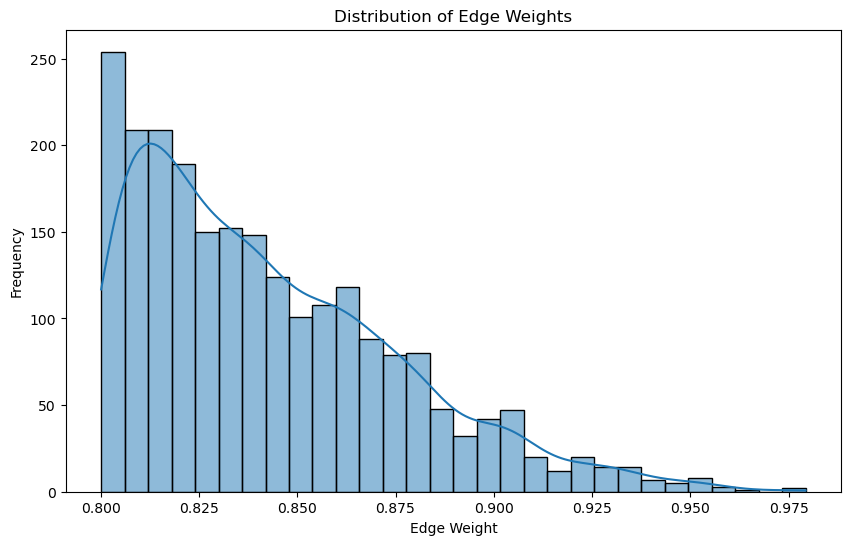

In [125]:
# Visualize the distribution of edge weights
visualize_edge_weight_distribution(pearson_graph_pruned)

In [140]:
def analyze_and_plot_density(graph):
    """
    Calculates and plots the density of the graph for a predefined series of thresholds.

    Parameters:
    graph (nx.Graph): The original NetworkX graph.

    Returns:
    densities (list of float): Densities of the graph at each threshold.
    """
    thresholds = [0.7 + i * 0.01 for i in range(31)]
    densities = []

    for threshold in thresholds:
        filtered_edges = [(u, v) for u, v, d in graph.edges(data=True) if d['weight'] > threshold]
        temp_graph = nx.Graph()
        temp_graph.add_edges_from(filtered_edges)
        densities.append(nx.density(temp_graph))

    # Plot the densities
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, densities, marker='o')
    plt.xlabel('Threshold')
    plt.ylabel('Density')
    plt.title('Density vs. Threshold')
    plt.grid(True)
    plt.show()

    return densities

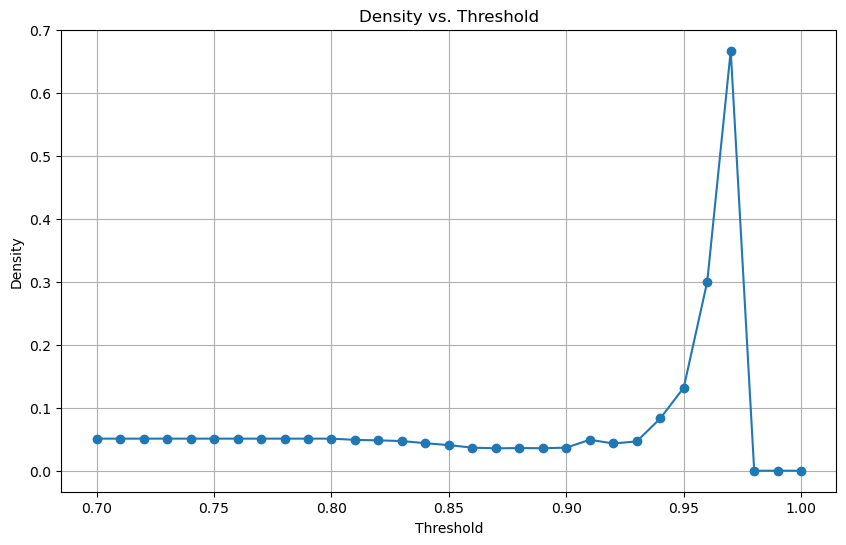

In [141]:
densities = analyze_and_plot_density(pearson_graph_pruned)

In [142]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Define the sparsification functions
def threshold_sparsification(graph, threshold):
    """
    Sparsifies the graph by removing edges below the specified weight threshold.

    Parameters:
    graph (nx.Graph): The original NetworkX graph.
    threshold (float): The weight threshold.

    Returns:
    nx.Graph: The sparsified graph.
    """
    sparsified_graph = nx.Graph()
    sparsified_graph.add_nodes_from(graph.nodes(data=True))
    sparsified_graph.add_edges_from((u, v, d) for u, v, d in graph.edges(data=True) if d['weight'] >= threshold)
    return sparsified_graph

def top_percentage_sparsification(graph, top_percentage):
    """
    Sparsifies the graph by keeping the top percentage of edges by weight.

    Parameters:
    graph (nx.Graph): The original NetworkX graph.
    top_percentage (float): The percentage of top-weight edges to keep.

    Returns:
    nx.Graph: The sparsified graph.
    """
    sorted_edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
    top_edges_count = int(len(sorted_edges) * (top_percentage / 100))
    sparsified_graph = nx.Graph()
    sparsified_graph.add_nodes_from(graph.nodes(data=True))
    sparsified_graph.add_edges_from(sorted_edges[:top_edges_count])
    return sparsified_graph

def remove_by_closeness(graph, threshold):
    """
    Sparsifies the graph by removing nodes with closeness centrality below the specified threshold.

    Parameters:
    graph (nx.Graph): The original NetworkX graph.
    threshold (float): The closeness centrality threshold.

    Returns:
    nx.Graph: The sparsified graph.
    """
    closeness = nx.closeness_centrality(graph)
    # Create a copy to modify
    modified_graph = graph.copy()
    for gene, centrality in closeness.items():
        if centrality < threshold:
            modified_graph.remove_node(gene)
    return modified_graph

def remove_by_degree(graph, min_degree):
    """
    Sparsifies the graph by removing nodes with degree below the specified threshold.

    Parameters:
    graph (nx.Graph): The original NetworkX graph.
    min_degree (int): The minimum degree threshold.

    Returns:
    nx.Graph: The sparsified graph.
    """
    degrees = dict(graph.degree())
    # Create a copy to modify
    modified_graph = graph.copy()
    for gene, degree in degrees.items():
        if degree < min_degree:
            modified_graph.remove_node(gene)
    return modified_graph

def knn_sparsification(graph, k):
    """
    Sparsifies the graph by keeping only the top-k edges with the highest weights for each node.

    Parameters:
    graph (nx.Graph): The original NetworkX graph.
    k (int): The number of nearest neighbors to keep for each node.

    Returns:
    nx.Graph: The sparsified graph.
    """
    sparsified_graph = nx.Graph()
    sparsified_graph.add_nodes_from(graph.nodes(data=True))
    
    for node in graph.nodes():
        edges = sorted(graph.edges(node, data=True), key=lambda x: x[2]['weight'], reverse=True)
        sparsified_graph.add_edges_from(edges[:k])
    
    return sparsified_graph

def spanning_tree_sparsification(graph):
    """
    Sparsifies the graph by creating a minimum spanning tree.

    Parameters:
    graph (nx.Graph): The original NetworkX graph.

    Returns:
    nx.Graph: The sparsified graph.
    """
    sparsified_graph = nx.minimum_spanning_tree(graph, weight='weight')
    return sparsified_graph


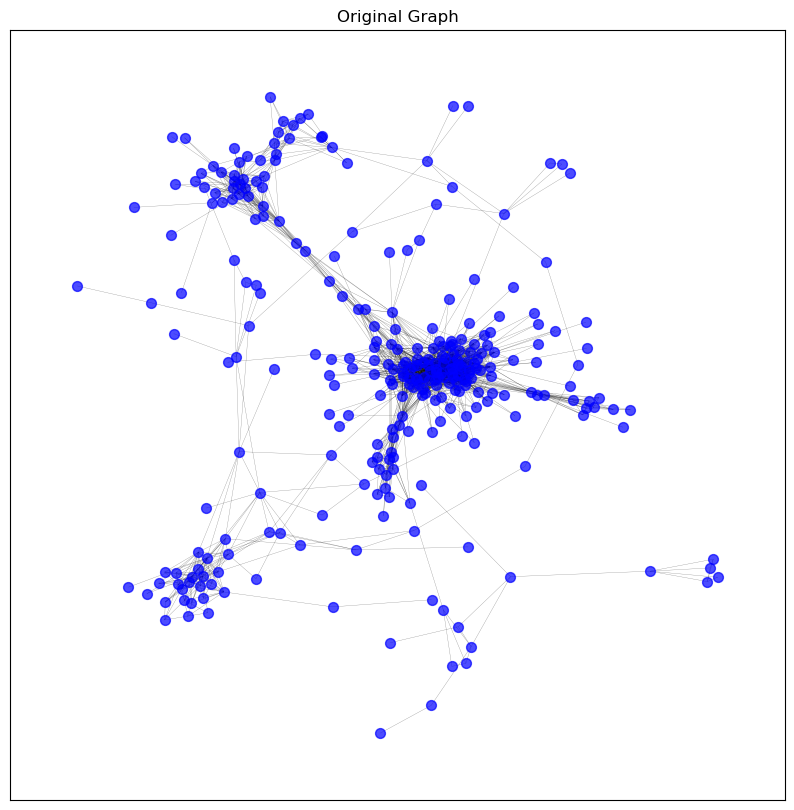

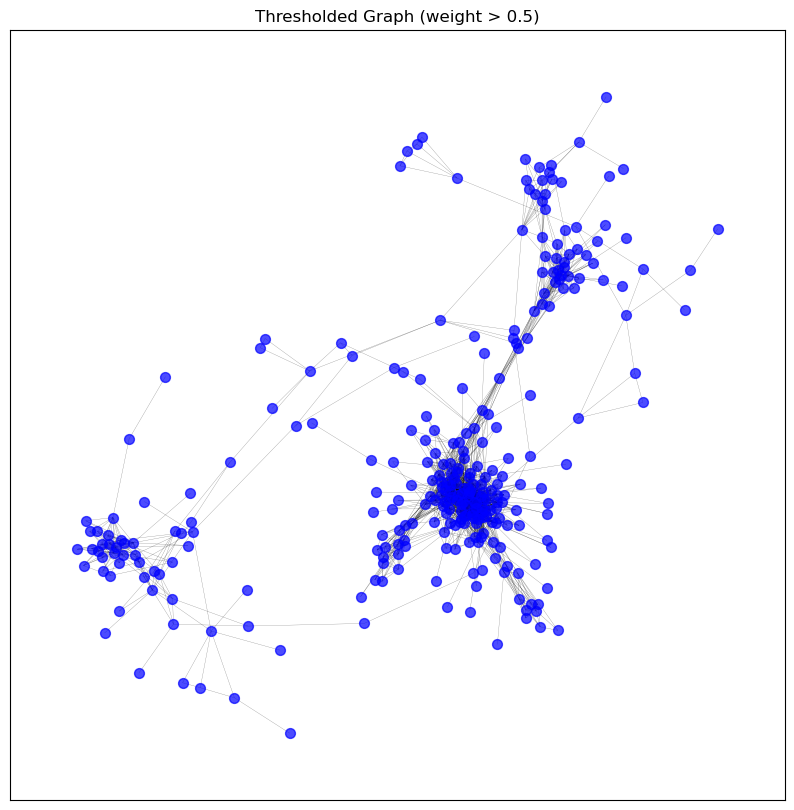

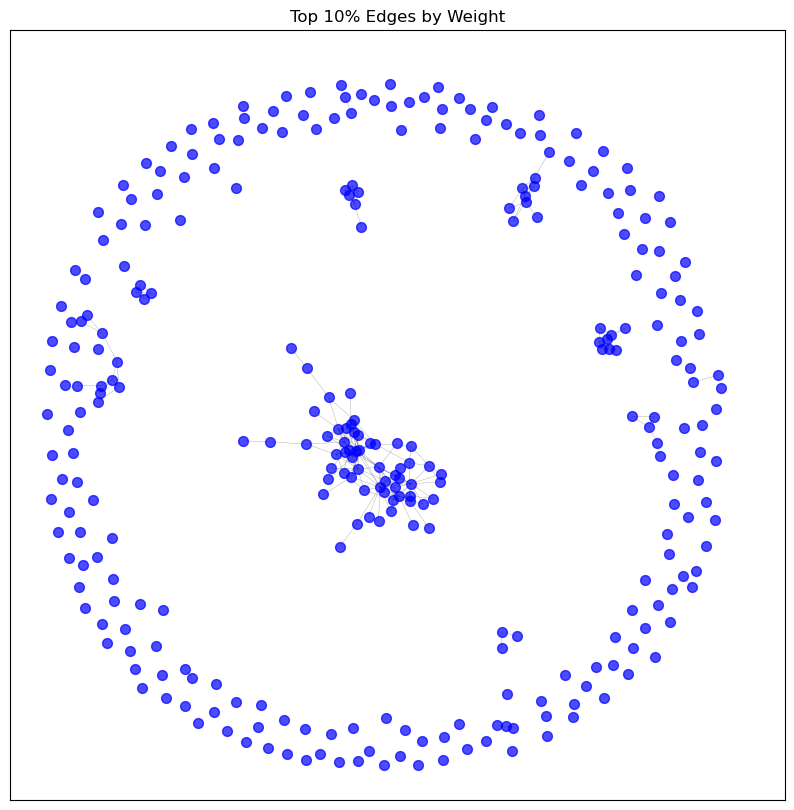

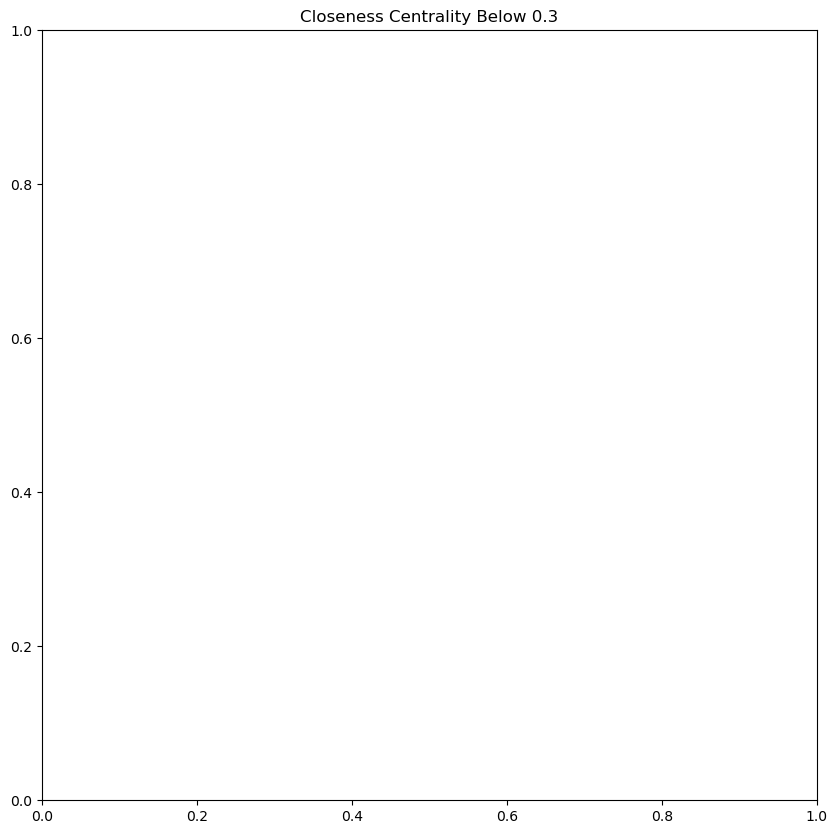

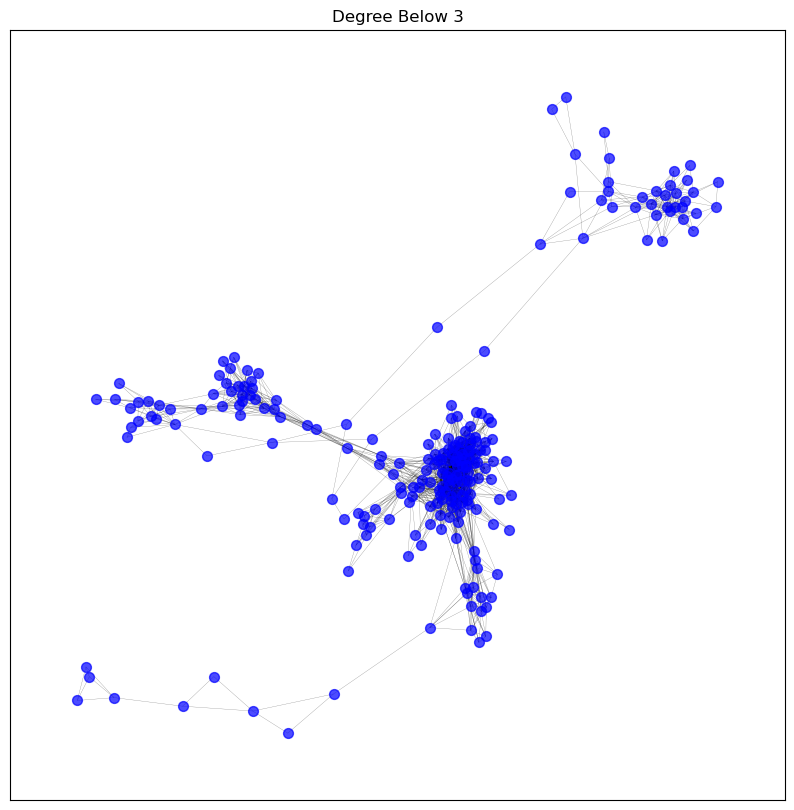

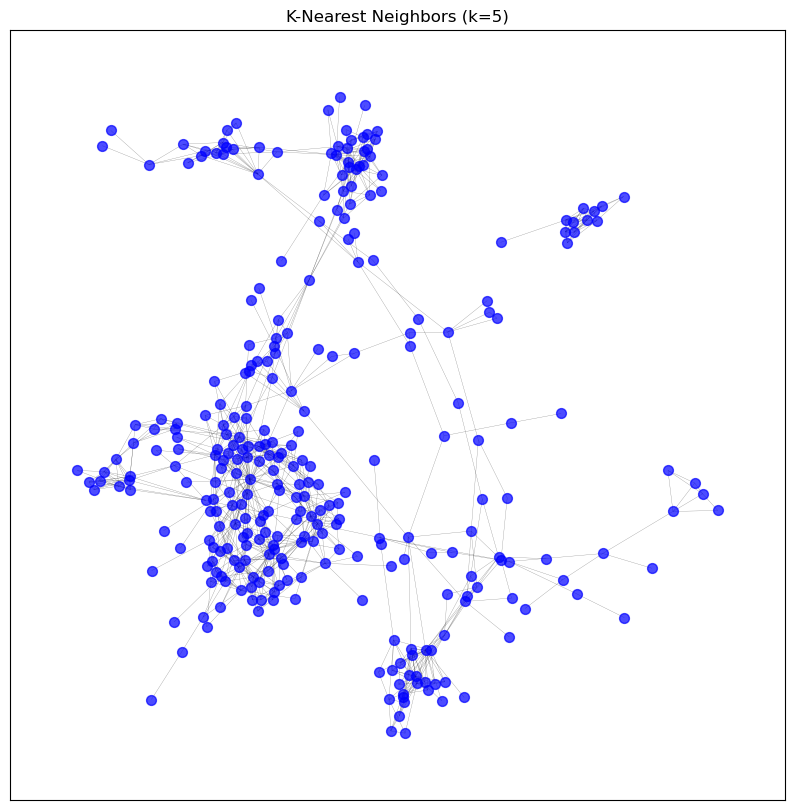

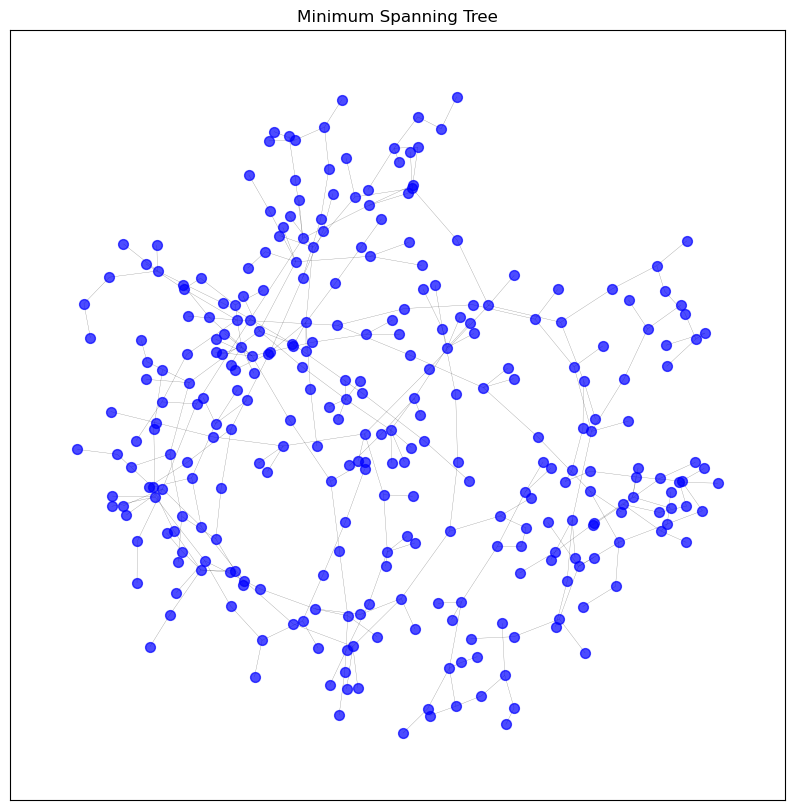

In [190]:
# Initialize a dictionary to store graphs
graphs = {}
graphs['original'] = pearson_graph_pruned.copy()  # Store the original graph

# Apply sparsification methods
graphs['threshold_0.5'] = threshold_sparsification(graphs['original'], threshold=0.5)
graphs['top_10_percent'] = top_percentage_sparsification(graphs['original'], top_percentage=10)
graphs['closeness_below_0.3'] = remove_by_closeness(graphs['original'], threshold=0.3)
graphs['degree_below_3'] = remove_by_degree(graphs['original'], min_degree=3)
graphs['knn_5'] = knn_sparsification(graphs['original'], k=5)
graphs['spanning_tree'] = spanning_tree_sparsification(graphs['original'])


# Example visualization
visualize_graph(graphs['original'], 'Original Graph')
visualize_graph(graphs['threshold_0.5'], 'Thresholded Graph (weight > 0.5)')
visualize_graph(graphs['top_10_percent'], 'Top 10% Edges by Weight')
visualize_graph(graphs['closeness_below_0.3'], 'Closeness Centrality Below 0.3')
visualize_graph(graphs['degree_below_3'], 'Degree Below 3')
visualize_graph(graphs['knn_5'], 'K-Nearest Neighbors (k=5)')
visualize_graph(graphs['spanning_tree'], 'Minimum Spanning Tree')


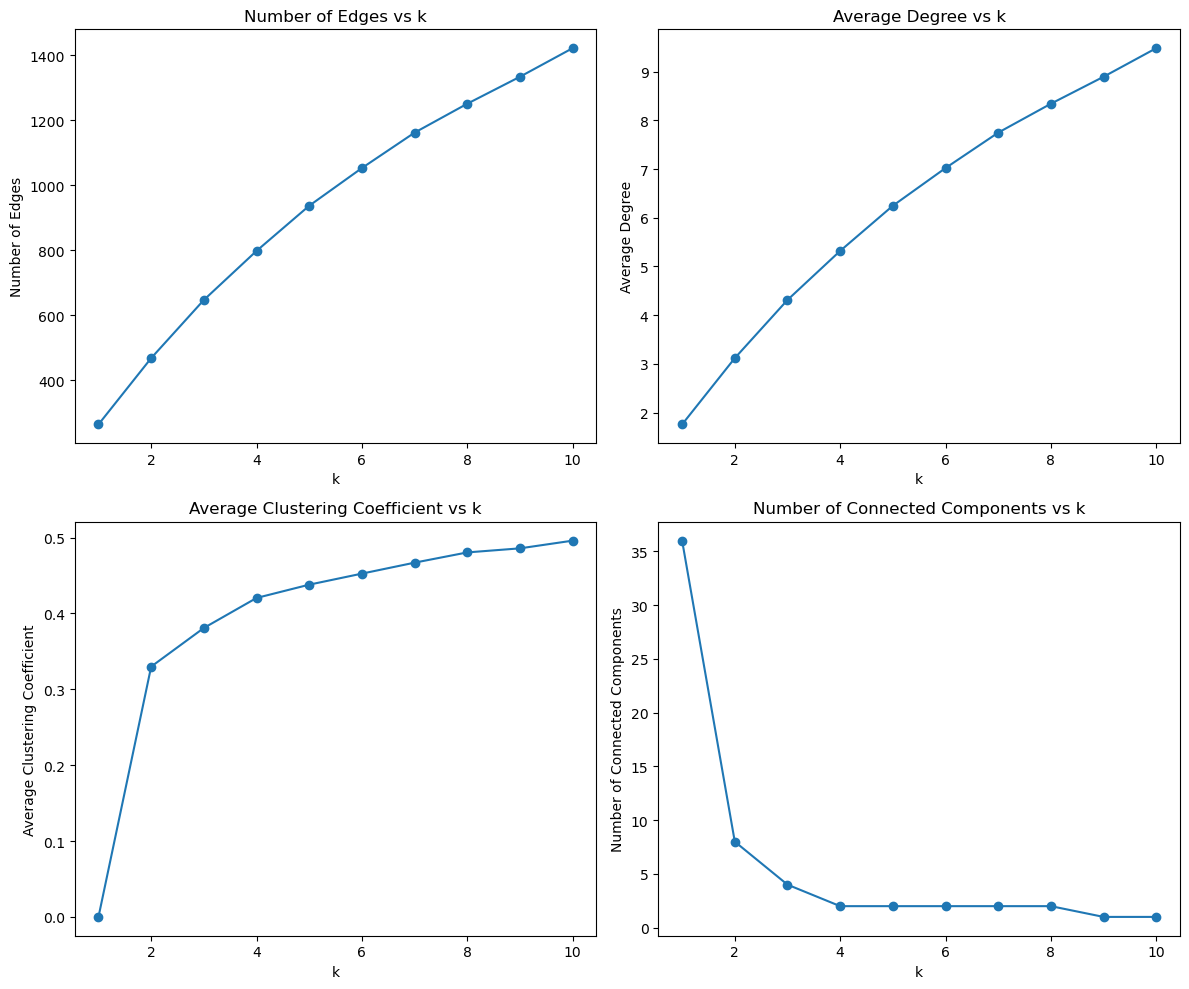

In [178]:
def analyze_knn_effect(graph, k_values):
    """
    Analyzes the effect of different k values on the network properties.

    Parameters:
    graph (nx.Graph): The original NetworkX graph.
    k_values (list): List of k values to use for sparsification.

    Returns:
    pd.DataFrame: DataFrame containing the analysis results.
    """
    results = {
        'k': [],
        'num_edges': [],
        'avg_degree': [],
        'avg_clustering': [],
        'num_connected_components': [],
    }
    
    for k in k_values:
        sparsified_graph = knn_sparsification(graph, k)
        num_edges = sparsified_graph.number_of_edges()
        avg_degree = sum(dict(sparsified_graph.degree()).values()) / sparsified_graph.number_of_nodes()
        avg_clustering = nx.average_clustering(sparsified_graph)
        num_connected_components = nx.number_connected_components(sparsified_graph)
        
        results['k'].append(k)
        results['num_edges'].append(num_edges)
        results['avg_degree'].append(avg_degree)
        results['avg_clustering'].append(avg_clustering)
        results['num_connected_components'].append(num_connected_components)
    
    return pd.DataFrame(results)

def plot_knn_analysis(df):
    """
    Plots the analysis of the effect of different k values on network properties.

    Parameters:
    df (pd.DataFrame): DataFrame containing the analysis results.
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    axes[0, 0].plot(df['k'], df['num_edges'], marker='o')
    axes[0, 0].set_title('Number of Edges vs k')
    axes[0, 0].set_xlabel('k')
    axes[0, 0].set_ylabel('Number of Edges')
    
    axes[0, 1].plot(df['k'], df['avg_degree'], marker='o')
    axes[0, 1].set_title('Average Degree vs k')
    axes[0, 1].set_xlabel('k')
    axes[0, 1].set_ylabel('Average Degree')
    
    axes[1, 0].plot(df['k'], df['avg_clustering'], marker='o')
    axes[1, 0].set_title('Average Clustering Coefficient vs k')
    axes[1, 0].set_xlabel('k')
    axes[1, 0].set_ylabel('Average Clustering Coefficient')
    
    axes[1, 1].plot(df['k'], df['num_connected_components'], marker='o')
    axes[1, 1].set_title('Number of Connected Components vs k')
    axes[1, 1].set_xlabel('k')
    axes[1, 1].set_ylabel('Number of Connected Components')
    
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming pearson_graph is your NetworkX graph
k_values = list(range(1, 11))  # Different k values to analyze
analysis_results = analyze_knn_effect(graphs['original'], k_values)

# Plot the analysis results
plot_knn_analysis(analysis_results)

In [176]:
import mygene
import networkx as nx

def get_highest_degree_nodes(graph, top_n=10):
    """
    Returns the nodes with the highest degree in the graph.

    Parameters:
    graph (nx.Graph): The NetworkX graph.
    top_n (int): The number of top nodes to return.

    Returns:
    List of tuples: Each tuple contains a node and its degree.
    """
    degrees = dict(graph.degree())
    sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
    return sorted_degrees[:top_n]

def fetch_gene_info(gene_list):
    """
    Fetches gene information from MyGene.info.

    Parameters:
    gene_list (list): List of gene symbols or Ensembl IDs.

    Returns:
    list: List of dictionaries containing gene information.
    """
    mg = mygene.MyGeneInfo()
    gene_info = mg.querymany(gene_list, scopes='symbol,ensembl.gene', 
                             fields='name,symbol,entrezgene,summary,disease,pathway', 
                             species='human')
    return gene_info

def print_gene_info_with_degree(top_genes_with_degrees, gene_info):
    """
    Prints gene information including the degree.

    Parameters:
    top_genes_with_degrees (list): List of tuples containing gene symbols and their degrees.
    gene_info (list): List of dictionaries containing gene information.
    """
    for gene, degree in top_genes_with_degrees:
        info = next((item for item in gene_info if item['query'] == gene), None)
        if info:
            print(f"Gene Symbol: {info.get('symbol', 'N/A')}")
            print(f"Degree: {degree}")
            print(f"Gene Name: {info.get('name', 'N/A')}")
            print(f"Entrez ID: {info.get('entrezgene', 'N/A')}")
            print(f"Summary: {info.get('summary', 'N/A')}")
            if 'disease' in info:
                diseases = ', '.join([d['term'] for d in info['disease']])
                print(f"Diseases: {diseases}")
            else:
                print("Diseases: N/A")
            if 'pathway' in info:
                pathways = []
                if isinstance(info['pathway'], dict):
                    for key in info['pathway']:
                        pathway_data = info['pathway'][key]
                        if isinstance(pathway_data, list):
                            pathways.extend([p['name'] for p in pathway_data if 'name' in p])
                        elif isinstance(pathway_data, dict) and 'name' in pathway_data:
                            pathways.append(pathway_data['name'])
                        elif isinstance(pathway_data, str):
                            pathways.append(pathway_data)
                print(f"Pathways: {', '.join(pathways) if pathways else 'N/A'}")
            else:
                print("Pathways: N/A")
            print("-" * 40)
        else:
            print(f"Gene not found: {gene}")
            print(f"Degree: {degree}")
            print("-" * 40)

# Example usage
# Assuming patient_network is your NetworkX graph
top_genes_with_degrees = get_highest_degree_nodes(pearson_graph_pruned, top_n=10)
gene_symbols = [gene for gene, degree in top_genes_with_degrees]

# Fetch gene information
gene_info = fetch_gene_info(gene_symbols)

# Print gene information including degree
print_gene_info_with_degree(top_genes_with_degrees, gene_info)


Gene Symbol: NCKAP1L
Degree: 84
Gene Name: NCK associated protein 1 like
Entrez ID: 3071
Summary: This gene encodes a member of the HEM family of tissue-specific transmembrane proteins which are highly conserved from invertebrates through mammals. This gene is only expressed in hematopoietic cells. The encoded protein is a part of the Scar/WAVE complex which plays an important role in regulating cell shape in both metazoans and plants. Alternatively spliced transcript variants encoding different isoforms have been found.[provided by RefSeq, May 2010].
Diseases: N/A
Pathways: Regulation of actin cytoskeleton - Homo sapiens (human), Pathogenic Escherichia coli infection - Homo sapiens (human), Salmonella infection - Homo sapiens (human), Signal Transduction, Signal Transduction, Disease, Disease, Innate Immune System, Innate Immune System, Immune System, Immune System, Signaling by VEGF, Signaling by Rho GTPases, Signaling by Rho GTPases, RHO GTPase Effectors, RHO GTPase Effectors, Fcgam

# Interactive Visualization

In [51]:
def visualize_interactive_network(graph, output_file='network.html'):
    """
    Visualizes a NetworkX graph interactively using PyVis.

    Parameters:
    graph (nx.Graph): The NetworkX graph to visualize.
    output_file (str): The filename for the output HTML file.
    """
    net = Network(notebook=True, width="100%", height="1000px")
    net.from_nx(graph)
    net.show(output_file)


In [161]:
# Visualize the graph interactively
visualize_interactive_network(p_pearson_graph_pruned, output_file='pearson_network.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [158]:
import networkx as nx
import plotly.graph_objects as go
import plotly.io as pio

def save_interactive_network_plotly(graph, output_file='network.html', title="Interactive Network"):
    # Extract node positions
    pos = nx.spring_layout(graph)

    # Extract edges
    edge_x = []
    edge_y = []
    for edge in graph.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    # Extract nodes
    node_x = []
    node_y = []
    node_text = []
    for node in graph.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(str(node))

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=node_text,
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='YlGnBu',
            size=10,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
        )
    )

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title=title,
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        annotations=[ dict(
                            text="",
                            showarrow=False,
                            xref="paper", yref="paper"
                        )],
                        xaxis=dict(showgrid=False, zeroline=False),
                        yaxis=dict(showgrid=False, zeroline=False))
                    )

    # Save the figure to an HTML file
    pio.write_html(fig, file=output_file, auto_open=True)

In [160]:
# Example usage
# Assuming patient_network is your NetworkX graph
save_interactive_network_plotly(p_pearson_graph_pruned, output_file='patient_similarity_network.html', title="Patient Similarity Network")


In [162]:
save_interactive_network_plotly(pearson_graph_pruned, output_file='gene_similarity_network.html', title="Patient Similarity Network")


# Storing generated networks

In [ ]:
#example
nx.write_gml(G, 'gene_coexpression_network.gml')


# Patient similarity network

In [146]:
# Based on the same expression matrix we can create a patient similarity network.
# By transposing the matrix will switch the rows and columns,
# meaning that patients will become the rows and genes will become the columns.
# By doing this, you can compute the correlation (or similarity) between patients based on their gene expression profiles,
# and then create a network where nodes represent patients and edges represent similarities.

In [147]:
# Transpose the matrix
patient_gene_matrix = df_renamed.T

In [222]:
patient_gene_matrix

TCGA-38-7271  TCGA-55-7914  TCGA-95-7043  TCGA-73-4658  TCGA-86-8076  \
A2M           17.7492       14.8513       14.1691       16.7238       15.6783   
A4GALT        10.1862        8.9312        9.0834        9.1443        9.5150   
AASS          11.2890       10.5920       10.5600       10.5574       10.3567   
AATK           8.6552        8.2660        8.8214        7.8940       10.4765   
ABAT           9.3090        8.7082       10.4276        9.0129       10.0012   
...               ...           ...           ...           ...           ...   
ZNF704        10.4701       10.4383       10.5026        9.5153       10.1274   
ZNF710        10.4908       10.6423        9.5442       10.9877       11.0332   
ZSCAN18        9.5323       10.3934       10.1984        8.7077        8.8800   
ZSCAN31        9.0817       10.9565       10.8095        8.9874        9.5810   
ZWINT          9.2615       10.1334       10.9149        9.7828        8.6640   

         TCGA-55-7726  TCGA-44-6147  TCGA-50-5932  TCGA-44-2661  TCGA-86-7954  \
A2M           14.7566       16.4368       15.5476       15.5478       15.1337   
A4GALT        11.4452        9.1462        7.3597        9.1602        8.9344   
AASS           9.0989       10.7586        9.6858        9.8150        9.9916   
AATK           6.9299        8.5002       10.8906        9.7992        7.6876   
ABAT          10.6104       10.3701        8.9353        9.9222        8.8425   
...               ...           ...           ...           ...           ...   
ZNF704        11.0242       13.1240       11.7253        9.7038       11.7234   
ZNF710         9.1093       10.3632       12.1249       10.7150       11.1126   
ZSCAN18        9.0832       10.6820        9.8849        8.5416        9.7700   
ZSCAN31        9.0185       10.2085        9.8803       11.0327       10.2707   
ZWINT         11.1212        9.0718       10.7305        9.0013       10.4268   

         ...  TCGA-97-A4M7  TCGA-62-A46R  TCGA-50-5055  TCGA-38-4628  \
A2M      ...       15.9553       13.9511       16.3097       14.3934   
A4GALT   ...        9.1019        8.6653       10.8837        8.6304   
AASS     ...       10.1705        9.7105        8.9037        7.4624   
AATK     ...        9.6428        9.9715        8.3250        8.1426   
ABAT     ...       10.0279       10.5192        9.1288       10.5509   
...      ...           ...           ...           ...           ...   
ZNF704   ...       10.0427       11.4464        9.7950       11.2189   
ZNF710   ...       10.6809        9.6927        9.7057        9.3922   
ZSCAN18  ...        8.9373        9.7879        9.4636        7.1319   
ZSCAN31  ...        9.2033       10.5020        8.8073        9.8672   
ZWINT    ...        9.7614       10.7593        9.7087       10.4729   

         TCGA-86-7713  TCGA-86-8073  TCGA-MN-A4N4  TCGA-53-7626  TCGA-44-A47G  \
A2M           15.8254       16.3773       14.9411       16.7343       15.6622   
A4GALT         9.3827        9.4234       11.9107        9.5379        9.8660   
AASS           9.6237       11.3497        9.6396       10.7802       10.3975   
AATK           9.6432        8.7741        9.3538        9.3085       10.1369   
ABAT          10.0726        8.5909       10.7165        9.4483        9.6835   
...               ...           ...           ...           ...           ...   
ZNF704        11.4331       11.5823       12.0731       11.5321        9.4188   
ZNF710        10.9911       10.9338       10.4151       10.7366       10.5552   
ZSCAN18       10.1160       10.1272       10.6468        9.4709       10.2110   
ZSCAN31       10.6419       10.2410        9.4672       10.0507        7.4843   
ZWINT         10.9794       10.1390       10.0583        9.4627        9.5817   

         TCGA-55-6969  
A2M           14.8136  
A4GALT         9.7702  
AASS           8.8889  
AATK           7.6565  
ABAT           8.6538  
...               ...  
ZNF704        10.7939  
ZNF710        11.5592  
ZSCAN18  

In [148]:
# Dictionary to store different correlation matrices
p_correlation_matrices = {}

# Pearson correlation
p_correlation_matrices['pearson'] = patient_gene_matrix.corr(method='pearson')

p_correlation_matrices['biweight_midcorrelation'] = abs_bicorr(patient_gene_matrix)

In [149]:
p_pearson_graph = create_graph_from_correlation(p_correlation_matrices['pearson'], threshold=0.1)

In [150]:
verify_edge_weights(p_pearson_graph, num_samples=10)

Sample of 10 edges with weights:
Edge (TCGA-38-7271, TCGA-73-4658) - weight: 0.8096370252553636
Edge (TCGA-38-7271, TCGA-49-6744) - weight: 0.8666451950864088
Edge (TCGA-38-7271, TCGA-78-8648) - weight: 0.8166297005921491
Edge (TCGA-38-7271, TCGA-99-8028) - weight: 0.8198508461567025
Edge (TCGA-38-7271, TCGA-86-8280) - weight: 0.8136441647877977
Edge (TCGA-38-7271, TCGA-50-5941) - weight: 0.8103323608706653
Edge (TCGA-38-7271, TCGA-86-8671) - weight: 0.8252323552539674
Edge (TCGA-38-7271, TCGA-99-AA5R) - weight: 0.8038829011309335
Edge (TCGA-38-7271, TCGA-50-8457) - weight: 0.8022850320798239
Edge (TCGA-38-7271, TCGA-44-2657) - weight: 0.811479576749465


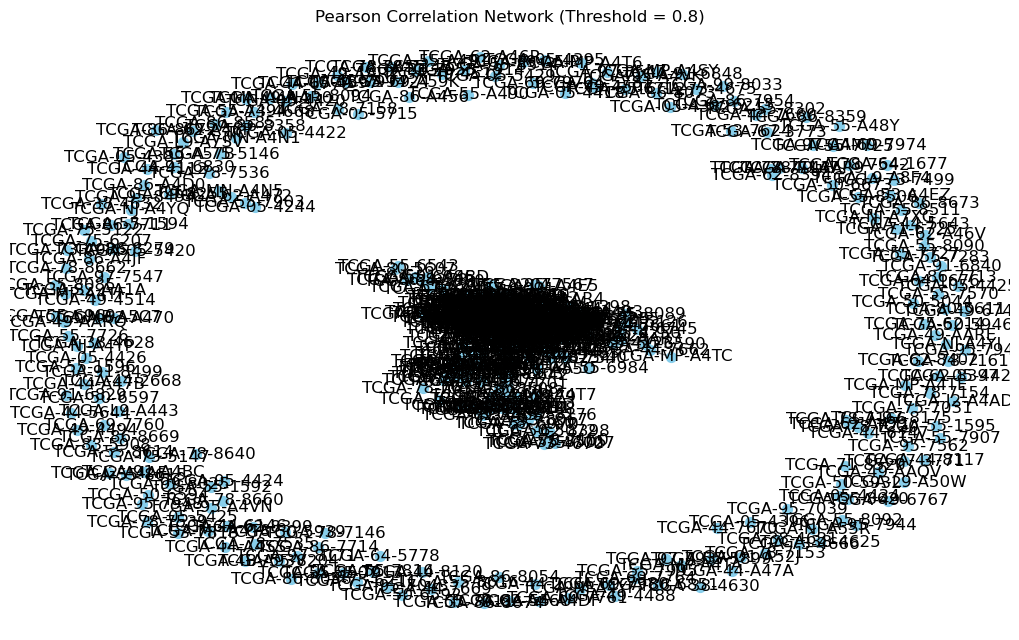

In [151]:
visualize_graph(p_pearson_graph, title='Pearson Correlation Network (Threshold = 0.8)')

In [152]:
# Clean the graph by removing unconnected nodes
p_pearson_graph_pruned = clean_graph(p_pearson_graph,
                                    degree_threshold=1,
                                    keep_largest_component=True)

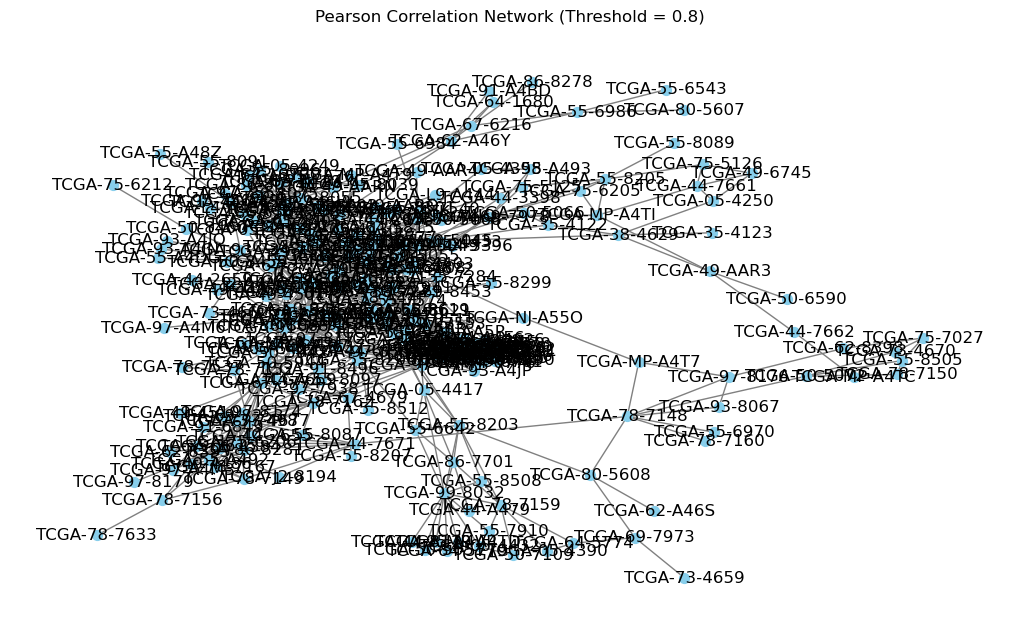

In [153]:
visualize_graph(p_pearson_graph_pruned, title='Pearson Correlation Network (Threshold = 0.8)')

In [202]:
print_graph_info(p_pearson_graph_pruned)

Number of nodes: 265
Number of edges: 1341
Sample nodes: ['TCGA-38-7271', 'TCGA-73-4658', 'TCGA-86-8076', 'TCGA-44-2661', 'TCGA-73-4662', 'TCGA-44-7671', 'TCGA-55-6978', 'TCGA-55-6986', 'TCGA-49-6744', 'TCGA-75-5125']
Sample edges: [('TCGA-38-7271', 'TCGA-73-4658', {'width': 0.8096370252553636}), ('TCGA-38-7271', 'TCGA-49-6744', {'width': 0.8666451950864088}), ('TCGA-38-7271', 'TCGA-78-8648', {'width': 0.8166297005921491}), ('TCGA-38-7271', 'TCGA-99-8028', {'width': 0.8198508461567025}), ('TCGA-38-7271', 'TCGA-86-8280', {'width': 0.8136441647877977}), ('TCGA-38-7271', 'TCGA-50-5941', {'width': 0.8103323608706653}), ('TCGA-38-7271', 'TCGA-86-8671', {'width': 0.8252323552539674}), ('TCGA-38-7271', 'TCGA-99-AA5R', {'width': 0.8038829011309335}), ('TCGA-38-7271', 'TCGA-50-8457', {'width': 0.8022850320798239}), ('TCGA-38-7271', 'TCGA-44-2657', {'width': 0.811479576749465})]


In [201]:
nx.write_gml(p_pearson_graph_pruned, 'patient_coexpression_network.gml')

['TCGA-38-7271',
 'TCGA-73-4658',
 'TCGA-86-8076',
 'TCGA-44-2661',
 'TCGA-73-4662',
 'TCGA-44-7671',
 'TCGA-55-6978',
 'TCGA-55-6986',
 'TCGA-49-6744',
 'TCGA-75-5125',
 'TCGA-38-4626',
 'TCGA-69-7763',
 'TCGA-93-8067',
 'TCGA-97-8179',
 'TCGA-86-8055',
 'TCGA-91-6835',
 'TCGA-55-6982',
 'TCGA-44-6774',
 'TCGA-50-5066',
 'TCGA-05-5423',
 'TCGA-67-3774',
 'TCGA-97-A4M2',
 'TCGA-95-7567',
 'TCGA-44-2656',
 'TCGA-35-4122',
 'TCGA-49-6761',
 'TCGA-55-6983',
 'TCGA-97-A4M3',
 'TCGA-50-5068',
 'TCGA-78-8648',
 'TCGA-44-6778',
 'TCGA-80-5608',
 'TCGA-86-8281',
 'TCGA-97-A4M5',
 'TCGA-49-4490',
 'TCGA-MP-A4T9',
 'TCGA-50-5942',
 'TCGA-MP-A4SV',
 'TCGA-49-AAR4',
 'TCGA-99-8032',
 'TCGA-50-6595',
 'TCGA-55-6968',
 'TCGA-64-1679',
 'TCGA-95-8039',
 'TCGA-44-A479',
 'TCGA-44-6148',
 'TCGA-NJ-A55O',
 'TCGA-55-6971',
 'TCGA-49-AARN',
 'TCGA-99-8028',
 'TCGA-75-6205',
 'TCGA-97-8552',
 'TCGA-50-8459',
 'TCGA-78-7150',
 'TCGA-86-A4P7',
 'TCGA-55-8206',
 'TCGA-64-5815',
 'TCGA-05-4433',
 'TCGA-44-A4SU

# DNAmeth PN

In [219]:
# Load the data using pickle
with open(r"C:\cdt_data\ismb_data\ISMB_TCGA_DNAm.pkl" , 'rb') as file : 
    data = pd.read_pickle(file)

meth_data = data["datExpr"]
meth_data

smoking_df = pd.read_csv(r"C:\cdt_data\montreal data\smoking.tsv" , delimiter='\t') #Tab seperated document from EWAS
common_annotated_cpgs = list(smoking_df['cpg'].value_counts()[smoking_df['cpg'].value_counts() > 10].index) 
cpgs = set(common_annotated_cpgs) & set(meth_data.columns)


common_patients = set(p_pearson_graph_pruned.nodes) & set(meth_data.index)


meth_data_filt = meth_data.loc[ list(common_patients) , list(cpgs)]

patient_meth_matrix = meth_data_filt.T


# Keep only patients who are prevalent in the patient gene network



In [220]:
meth_data_filt

cg11902777  cg06126421  cg27537125  cg02583484  cg21913886  \
TCGA-78-7148    0.188598    0.340322    0.210906    0.159295    0.315714   
TCGA-50-5049    0.238756    0.495068    0.219630    0.366095    0.668541   
TCGA-55-A492    0.222162    0.317394    0.232241    0.278380    0.315751   
TCGA-55-6968    0.227702    0.679096    0.121872    0.249716    0.644465   
TCGA-05-4390    0.123459    0.770416    0.108163    0.281993    0.334375   
...                  ...         ...         ...         ...         ...   
TCGA-44-2662    0.283854    0.497512    0.374094    0.420017    0.699358   
TCGA-91-6849    0.199630    0.370590    0.319437    0.329336    0.503465   
TCGA-55-8087    0.633414    0.125521    0.652526    0.536649    0.485101   
TCGA-78-7160    0.260182    0.422069    0.258024    0.331210    0.638856   
TCGA-55-7910    0.303831    0.756903    0.504505    0.178445    0.633372   

              cg06972908  cg14753356  cg18642234  cg09837977  cg02657160  ...  \
TCGA-78-7148    0.194627    0.297870    0.308852    0.704037    0.442032  ...   
TCGA-50-5049    0.459421    0.384948    0.546524    0.843480    0.752546  ...   
TCGA-55-A492    0.302680    0.297261    0.350602    0.887049    0.782031  ...   
TCGA-55-6968    0.458846    0.620325    0.353920    0.704397    0.785654  ...   
TCGA-05-4390    0.291894    0.717777    0.692428    0.856106    0.403077  ...   
...                  ...         ...         ...         ...         ...  ...   
TCGA-44-2662    0.484338    0.354540    0.456420    0.725237    0.642194  ...   
TCGA-91-6849    0.482706    0.261366    0.379072    0.874737    0.875193  ...   
TCGA-55-8087    0.166647    0.077789    0.779051    0.881753    0.840718  ...   
TCGA-78-7160    0.501645    0.369561    0.495701    0.799673    0.753284  ...   
TCGA-55-7910    0.330862    0.707693    0.429599    0.910430    0.527004  ...   

              cg00295485  cg27241845  cg18446336  cg05329352  cg14712058  \
TCGA-78-7148    0.514110    0.142698    0.761825    0.555753    0.865622   
TCGA-50-5049    0.446272    0.409503    0.745588    0.540957    0.746362   
TCGA-55-A492    0.235776    0.265886    0.886727    0.613484    0.833891   
TCGA-55-6968    0.559436    0.358654    0.519055    0.577284    0.752006   
TCGA-05-4390    0.324013    0.279930    0.739454    0.660966    0.845811   
...                  ...         ...         ...         ...         ...   
TCGA-44-2662    0.496154    0.348636    0.633679    0.444891    0.658708   
TCGA-91-6849    0.209112    0.307265    0.782511    0.448912    0.803016   
TCGA-55-8087    0.208531    0.155602    0.827421    0.556614    0.877141   
TCGA-78-7160    0.463241    0.393647    0.670029    0.467459    0.773838   
TCGA-55-7910    0.790567    0.431354    0.474223    0.688062    0.817902   

              cg22851561  cg03707168  cg11231349  cg08035323  cg01899089  
TCGA-78-7148    0.360425    0.092122    0.497470    0.106541    0.398411  
TCGA-50-5049    0.455016    0.299898    0.518712    0.298637    0.385076  
TCGA-55-A492    0.461869    0.111687    0.375595    0.310948    0.393841  
TCGA-55-6968    0.647145    0.146030    0.359615    0.399034    0.566220  
TCGA-05-4390    0.591029    0.484507    0.579503    0.189445    0.398149  
...                  ...         ...         ...         ...         ...  
TCGA-44-2662    0.365388    0.047842    0.566390    0.210904    0.525209  
TCGA-91-6849    0.597776    0.098773    0.483343    0.243451    0.484162  
TCGA-55-8087    0.348059    0.074510    0.450400    0.212234    0.625940  
TCGA-78-7160    0.502865    0.253881    0.650328    0.227759    0.512970  
TCGA-55-7910    0.659378    0.216981    0.688879    0.605801    0.665490  

[235 rows x 112 columns]

In [221]:
patient_meth_matrix

TCGA-78-7148  TCGA-50-5049  TCGA-55-A492  TCGA-55-6968  \
cg11902777      0.188598      0.238756      0.222162      0.227702   
cg06126421      0.340322      0.495068      0.317394      0.679096   
cg27537125      0.210906      0.219630      0.232241      0.121872   
cg02583484      0.159295      0.366095      0.278380      0.249716   
cg21913886      0.315714      0.668541      0.315751      0.644465   
...                  ...           ...           ...           ...   
cg22851561      0.360425      0.455016      0.461869      0.647145   
cg03707168      0.092122      0.299898      0.111687      0.146030   
cg11231349      0.497470      0.518712      0.375595      0.359615   
cg08035323      0.106541      0.298637      0.310948      0.399034   
cg01899089      0.398411      0.385076      0.393841      0.566220   

            TCGA-05-4390  TCGA-97-7553  TCGA-55-8091  TCGA-64-1679  \
cg11902777      0.123459      0.336163      0.199431      0.386117   
cg06126421      0.770416      0.336705      0.251259      0.209973   
cg27537125      0.108163      0.294550      0.198892      0.170497   
cg02583484      0.281993      0.407587      0.223709      0.454930   
cg21913886      0.334375      0.530593      0.364765      0.303741   
...                  ...           ...           ...           ...   
cg22851561      0.591029      0.479016      0.440796      0.670061   
cg03707168      0.484507      0.139845      0.112849      0.088930   
cg11231349      0.579503      0.628030      0.549006      0.658119   
cg08035323      0.189445      0.241746      0.108830      0.108530   
cg01899089      0.398149      0.465707      0.481772      0.648127   

            TCGA-55-8203  TCGA-75-6203  ...  TCGA-99-AA5R  TCGA-75-5126  \
cg11902777      0.127787      0.435182  ...      0.381141      0.289954   
cg06126421      0.284723      0.386720  ...      0.498146      0.304907   
cg27537125      0.137077      0.301230  ...      0.317605      0.414555   
cg02583484      0.196080      0.355938  ...      0.395244      0.221011   
cg21913886      0.464152      0.590897  ...      0.605272      0.470132   
...                  ...           ...  ...           ...           ...   
cg22851561      0.538551      0.270053  ...      0.378414      0.628792   
cg03707168      0.113254      0.166381  ...      0.128973      0.124607   
cg11231349      0.620552      0.717716  ...      0.592867      0.794467   
cg08035323      0.183668      0.202930  ...      0.307965      0.235075   
cg01899089      0.445489      0.559101  ...      0.513178      0.527190   

            TCGA-55-A493  TCGA-50-5933  TCGA-NJ-A55O  TCGA-44-2662  \
cg11902777      0.153563      0.495841      0.333090      0.283854   
cg06126421      0.636901      0.466633      0.370828      0.497512   
cg27537125      0.170152      0.482773      0.325552      0.374094   
cg02583484      0.402879      0.450024      0.313747      0.420017   
cg21913886      0.553796      0.560890      0.525385      0.699358   
...                  ...           ...           ...           ...   
cg22851561      0.448726      0.363036      0.261614      0.365388   
cg03707168      0.275365      0.080670      0.098990      0.047842   
cg11231349      0.540944      0.596777      0.637027      0.566390   
cg08035323      0.195966      0.020942      0.216892      0.210904   
cg01899089      0.577672      0.562697      0.504005      0.525209   

            TCGA-91-6849  TCGA-55-8087  TCGA-78-7160  TCGA-55-7910  
cg11902777      0.199630      0.633414      0.260182      0.303831  
cg06126421      0.370590      0.125521      0.422069      0.756903  
cg27537125      0.319437      0.652526      0.258024      0.504505  
cg02583484      0.329336      0.536649      0.331210      0.178445  
cg21913886      0.503465      0.485101      0.638856      0.633372  
...                  ...           ...           ...           ...  
cg22851561      0.597776      0.348059      0.502865      0.659378  
cg03707168      0.098773      0.0745

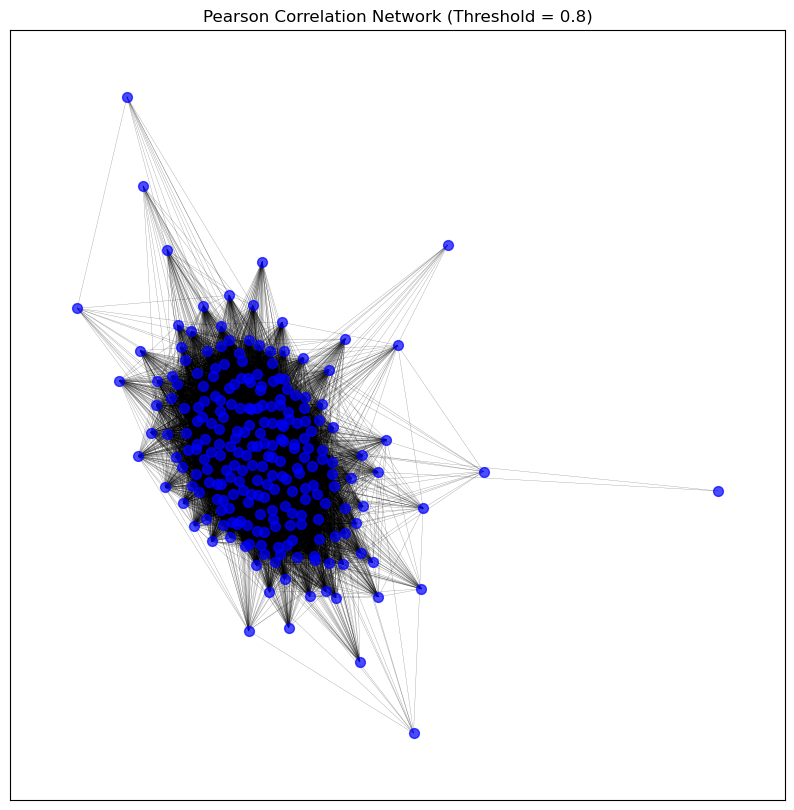

In [232]:

# Dictionary to store different correlation matrices
p_meth_correlation_matrices = {}

# Pearson correlation
p_meth_correlation_matrices['pearson'] = patient_meth_matrix.corr(method='pearson')
p_meth_pearson_graph = create_graph_from_correlation(p_meth_correlation_matrices['pearson'], threshold=0.8)
# Clean the graph by removing unconnected nodes
p_meth_pearson_graph_pruned = clean_graph(p_meth_pearson_graph,
                                    degree_threshold=1,
                                    keep_largest_component=True)

visualize_graph(p_meth_pearson_graph_pruned, title='Pearson Correlation Network (Threshold = 0.8)')


In [236]:
p_meth_pearson_graph_pruned_knn = knn_sparsification(p_meth_pearson_graph_pruned, k=6)
print_graph_info(p_meth_pearson_graph_pruned_knn)

Number of nodes: 232
Number of edges: 1146
Sample nodes: ['TCGA-78-7148', 'TCGA-50-5049', 'TCGA-55-A492', 'TCGA-05-4390', 'TCGA-97-7553', 'TCGA-55-8091', 'TCGA-64-1679', 'TCGA-55-8203', 'TCGA-75-6203', 'TCGA-67-4679']
Sample edges: [('TCGA-78-7148', 'TCGA-MP-A4T7', {'weight': 0.9231502976550506}), ('TCGA-78-7148', 'TCGA-73-7498', {'weight': 0.916870338691655}), ('TCGA-78-7148', 'TCGA-05-4384', {'weight': 0.9165625807041039}), ('TCGA-78-7148', 'TCGA-NJ-A55O', {'weight': 0.9069721031614792}), ('TCGA-78-7148', 'TCGA-69-7763', {'weight': 0.902431442079937}), ('TCGA-78-7148', 'TCGA-78-7149', {'weight': 0.8989120506869505}), ('TCGA-78-7148', 'TCGA-62-8398', {'weight': 0.8509281531129907}), ('TCGA-50-5049', 'TCGA-50-5068', {'weight': 0.9514961481043895}), ('TCGA-50-5049', 'TCGA-MP-A4TJ', {'weight': 0.9511371020437813}), ('TCGA-50-5049', 'TCGA-MP-A4T4', {'weight': 0.950599703006642})]


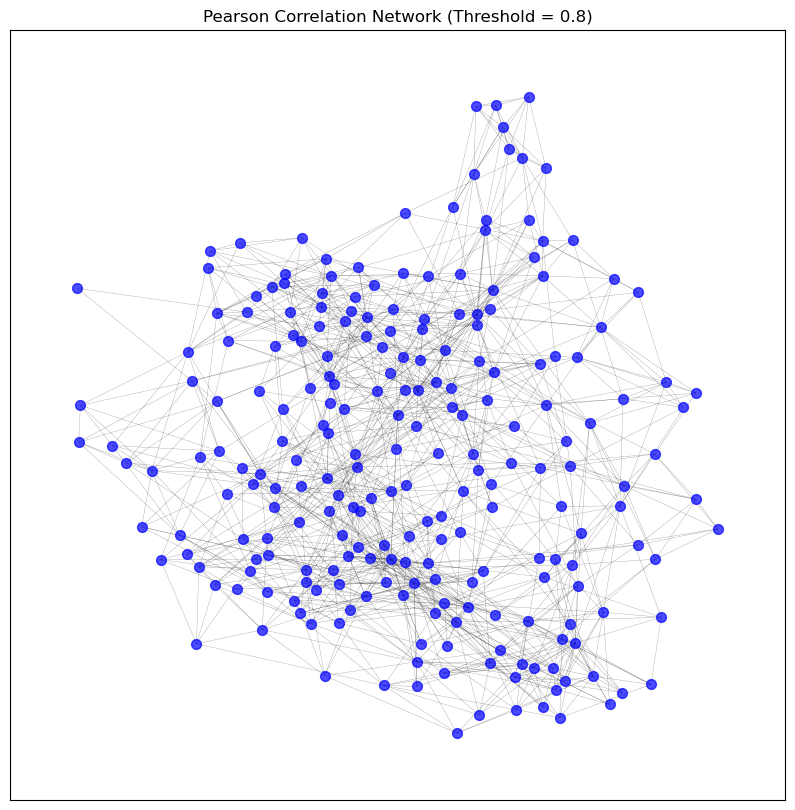

In [237]:
visualize_graph(p_meth_pearson_graph_pruned_knn, title='Pearson Correlation Network (Threshold = 0.8)')


In [239]:
print_graph_info(p_meth_pearson_graph_pruned_knn)

Number of nodes: 232
Number of edges: 1146
Sample nodes: ['TCGA-78-7148', 'TCGA-50-5049', 'TCGA-55-A492', 'TCGA-05-4390', 'TCGA-97-7553', 'TCGA-55-8091', 'TCGA-64-1679', 'TCGA-55-8203', 'TCGA-75-6203', 'TCGA-67-4679']
Sample edges: [('TCGA-78-7148', 'TCGA-MP-A4T7', {'weight': 0.9231502976550506}), ('TCGA-78-7148', 'TCGA-73-7498', {'weight': 0.916870338691655}), ('TCGA-78-7148', 'TCGA-05-4384', {'weight': 0.9165625807041039}), ('TCGA-78-7148', 'TCGA-NJ-A55O', {'weight': 0.9069721031614792}), ('TCGA-78-7148', 'TCGA-69-7763', {'weight': 0.902431442079937}), ('TCGA-78-7148', 'TCGA-78-7149', {'weight': 0.8989120506869505}), ('TCGA-78-7148', 'TCGA-62-8398', {'weight': 0.8509281531129907}), ('TCGA-50-5049', 'TCGA-50-5068', {'weight': 0.9514961481043895}), ('TCGA-50-5049', 'TCGA-MP-A4TJ', {'weight': 0.9511371020437813}), ('TCGA-50-5049', 'TCGA-MP-A4T4', {'weight': 0.950599703006642})]


In [240]:
#example
nx.write_gml(p_meth_pearson_graph_pruned_knn, 'patient_meth_network.gml')


# Setting up PIP network using String

In [ ]:
# create a concatenated list of gene names as strings
# note we are taking gene names from the 'gene' column of the dataframe we obtained from the EWAS catalog and filtered
# to common CpG and Gene sites above. The join function then concatenates them using the '%0D' string
# to stitch them all together. This string will be used to help us build the API query URL.
external_gene_names = '%0D'.join(map(str,df_filt['gene'].iloc[:300].drop_duplicates()))

# pass the list of Gene Names to the String-DB API return the String-IDs
# we first form the query url using the 'get_string_ids' API function which takes a list of identifiers and
# converts them into the internal String-DB accession IDs. This massively speeds up the search and allows us to
# search for more than 10 at once which is an API restriction for other API functions if String-DB internal accessions 
# aren't used.
query_url = 'https://string-db.org/api/tsv-no-header/get_string_ids?identifiers='+external_gene_names+'&species=9606&format=only-ids'

# use the urllib library to retrieve the String-DB internal IDs
result = ul.request.urlopen(query_url).read().decode('utf-8')

# now we want to query String-DB to retrieve interactions from this list of String-DB IDs
# we create a concatenated list of stringdbIDs in much the same way as above for the Entrez Gene IDs
stringdbIDs = '%0D'.join(result.splitlines())

# again we build the query for interactions using the String-DB IDs
query_url = 'https://string-db.org/api/tsv/network?identifiers='+stringdbIDs+'&species=9606'

# again using urllib to retrieve the interactions these are returned in a standard tab delimied text format
interactions = ul.request.urlopen(query_url).read().decode('utf-8').splitlines()

# we need to split the result by these 'tabs' (\t - is used to identfy them)
int_test = [interaction.split('\t') for interaction in interactions]

# we extract the field names from the first row
column_names = int_test[:1][0]

# create a Pandas dataframe of the interaction data we have just retrieved from String-DB
interactions_df = pd.DataFrame(int_test,columns=column_names)

# delete the first row that held the fieldnames but we no longer need
interactions_df = interactions_df.drop(labels=0,axis=0)

# remove any duplicate rows
final_interactions = interactions_df.drop_duplicates()

# show the top of the protein-protein interaction table
final_interactions.head()